<div style="border: 1px solid black; padding: 10px;">
<table>
<tr>
    <td width=20%>
        <br/> <a style="font-size: 16px; font-weight: italic">  Junior Data Scientist </a> <br/> <br/> Théo JEAN <br/>
    </td>
    <td width=60%>
        <center>
            <h1>Bank attrition analysis</h1>
            <h2> <font color='red'> Which types of customers are most likely to leave the bank?</font> </h2>
        </center>
    </td>
    <td width=20%>
        <a style="font-size: 16px; font-weight: bold"> Personal project 1 </a>
         <br/> 01/08/2024 <br/>
    </td>
</tr>
</table>
</div>

# Introduction : 

The aim of this project is to create a Machine Learning model to predict customer attrition in a bank. This notebook is structured in three main steps:

- **Exploratory Data Analysis:**

We'll start by displaying the overall characteristics of our portfolio of bank customers by performing descriptive statistics and graphical visualisations. This step will give us an overview of the data and enable us to draw some useful initial conclusions.

- **Data pre-processing:**

Next, we'll proceed to data pre-processing. This will include cleaning and transforming the data to make it suitable for model training. We will also display some intermediate results to help with the selection of relevant models and variables.

- **Model optimisation and prediction:**

Finally, we will proceed to optimize the model by adjusting its hyperparameters to maximize its performance. This stage will involve the evaluation of several cross-validation and model selection techniques. The aim is to develop a robust and accurate model to predict which customers are most likely to leave the bank.

Technically, we'll be looking to maximise the F1-score metric, thereby striking an optimal balance between precision and recall. This will help us minimise both false positives and false negatives, ensuring that our model correctly identifies customers likely to leave the bank, while reducing misclassification errors.

## Table of Contents

* [First overview of the dataset](#first-overview-of-the-dataset)
* [1. Exploratory Data Analysis (EDA)](#1-exploratory-data-analysis-eda)
    * [1.1. Qualitative variables](#11-qualitative-variables)
    * [1.2. Quantitative variables](#12-quantitative-variables)
* [2. Preprocessing](#2-preprocessing)
* [3. Modeling](#3-modeling)
    * [3.1. Evaluation procedure](#31-evaluation-procedure)
    * [3.2. Evaluation of pre-selected models](#32-evaluation-of-pre-selected-models)
    * [3.3. Feature selection](#33-feature-selection)
* [4. Optimisation](#4-optimisation)
    * [4.1. GradientBoosting optimisation](#41-gradientboosting-optimisation)
    * [4.2. XGBoost optimisation](#42-xgboost-optimisation)
* [5. Analysis of misclassification errors](#5-analysis-of-misclassification-errors)
* [6. Conclusion](#6-conclusion)

# First overview of the dataset : 

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_curve, auc, accuracy_score, make_scorer, precision_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing dataset
df = pd.read_csv("BankChurners.csv", sep=",")

In [3]:
# Five first rows
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [3]:
# Deletion of last two columns not required for analysis
df = df.iloc[:, :-2] 

In [5]:
class DataSummary:
    """
    Class that summarises
    """
    def __init__(self, df: pd.DataFrame):
        self.df = df

    def summary(self):
        raise NotImplementedError("Summary method must be implemented in each subclass")

    def format_summary(self, summary_df):
        lines = []
        headers = summary_df.columns
        column_widths = [max(len(str(row[col])) for row in summary_df.to_dict('records')) for col in headers]
        column_widths = [max(width, len(header)) for width, header in zip(column_widths, headers)]
        header_line = "| " + " | ".join(f"{col:<{width}}" for col, width in zip(headers, column_widths)) + " |"
        lines.append(header_line)
        lines.append('-' * len(header_line))
        for _, row in summary_df.iterrows():
            line = "| " + " | ".join(f"{str(row[col]):<{width}}" for col, width in zip(headers, column_widths)) + " |"
            lines.append(line)
        return "\n".join(lines)

class QuantitativeSummary(DataSummary):
    """
    Class to summarise quantitative data
    """
    def summary(self):
        quanti_col = self.df.select_dtypes(include=['number'])
        summary = []

        for col in quanti_col.columns:
            unique_values = quanti_col[col].dropna().unique()
            missing_percentage = round(self.df[col].isna().mean() * 100, 2)
            min_value = quanti_col[col].min()
            max_value = quanti_col[col].max()
            mean_value = round(quanti_col[col].mean(), 2)
            std_value = round(np.std(quanti_col[col]), 2)
            median_value = round(quanti_col[col].median(), 2)
            summary.append({
                'Variable': col,
                'Type': quanti_col[col].dtype,
                'Missing %': f"{missing_percentage:.2f}%",
                'Mean': mean_value,
                'Median': median_value,
                'Std': std_value,
                'Min': min_value,
                'Max': max_value,
                'Unique Values (Top 5)': unique_values[:5]
            })

        return pd.DataFrame(summary)

class QualitativeSummary(DataSummary):
    """
    Class to summarise qualitative data
    """
    def summary(self):
        quali_col = self.df.select_dtypes(exclude=['number'])
        summary = []

        for col in quali_col.columns:
            missing_percentage = round(self.df[col].isna().mean() * 100, 2)
            most_freq_value = quali_col[col].mode().iloc[0] if not quali_col[col].mode().empty else 'N/A'
            freq_distrib = quali_col[col].value_counts(normalize=True).to_dict()
            top_5_cat = ', '.join([f"{k} ({v:.2%})" for k, v in list(freq_distrib.items())[:5]])
            summary.append({
                'Variable': col,
                'Type': quali_col[col].dtype,
                'Missing %': f"{missing_percentage:.2f}%",
                'Most Frequent Value': most_freq_value,
                'Unique Values (Top 5)': top_5_cat
            })

        return pd.DataFrame(summary)

class Info:
    """
    Class providing a macro view of the data, displaying descriptive statistics for the different variables.
    """
    def __init__(self, df: pd.DataFrame):
        self.df = df
        self.quant_summary = QuantitativeSummary(df)
        self.qual_summary = QualitativeSummary(df)
        print("\nInfo object created")

    def display_summary(self):
        quanti_summary_df = self.quant_summary.summary()
        quali_summary_df = self.qual_summary.summary()

        print()
        print("Dataset of", len(self.df), "rows and", len(self.df.columns), "variables.")
        print()
        print("***" * 40)
        print()
        print("Quantitative Variables Summary:", len(quanti_summary_df))
        print(self.quant_summary.format_summary(quanti_summary_df))
        print()
        print("***" * 40)
        print()
        print("Qualitative Variables Summary:", len(quali_summary_df))
        print(self.qual_summary.format_summary(quali_summary_df))


In [6]:
info = Info(df)


Info object created


In [7]:
info.display_summary()


Dataset of 10127 rows and 21 variables.

************************************************************************************************************************

Quantitative Variables Summary: 15
| Variable                 | Type    | Missing % | Mean         | Median      | Std         | Min         | Max         | Unique Values (Top 5)                               |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| CLIENTNUM                | int64   | 0.00%     | 739177606.33 | 717926358.0 | 36901961.36 | 708082083.0 | 828343083.0 | [768805383 818770008 713982108 769911858 709106358] |
| Customer_Age             | int64   | 0.00%     | 46.33        | 46.0        | 8.02        | 26.0        | 73.0        | [45 49 51 40 44]                                    |
| Dependent_count          | int64   | 0.00%     | 2.35         | 2.0         | 1.3         | 0.0

`CLIENTNUM` : Unique identifier for the client.

`Attrition_Flag` **(Target)** : Indicates whether a client has left the bank (1) or stayed (0).

`Customer_Age` : Age of the client.

`Gender` : Gender of the client.

`Dependent_count` : Number of dependents financially supported by the client.

`Education_level` : Education level of the client.

`Marital_Status` : Marital status of the client.

`Income_category` : Income range of the client.

`Card_Category` : Type of bank card held by the client.

`Months_on_book` : Period in months the client has been with this bank.

`Total_Relationship_Count` : Total number of products held by the client.

`Months_Inactive_12_mon` : Number of inactive months in the last 12 months.

`Contacts_Count_12_mon` : Number of contacts with the bank in the last 12 months.

`Credit_Limit` : Credit limit of the client.

`Total_Revolving_Bal`: Total current revolving balance of the client.

`Avg_Open_To_Buy` : Average amount left to spend at the end of the month over the last 12 months.

`Total_Amt_Chng_Q4_Q1` : Relative change rate between the fourth quarter (Q4) and the first quarter (Q1) in amount => (Q4-Q1)/Q1

`Total_Trans_Amt` : Average total transaction amount (last 12 months).

`Total_Trans_Ct` : Average total number of transactions (last 12 months).

`Total_Ct_Chng_Q4_Q1` : Relative change rate between the fourth quarter (Q4) and the first quarter (Q1) in number => (Q4-Q1)/Q1

`Avg_Utilization_Ratio` : Credit card utilisation ratio (e.g., 0.2 means the client uses 20% of the available credit on their card on average)

### PROFILE :

**Demographics:**

- Age: Clients are, on average, 46.33 years old.
- Dependents: The average number of dependents is 2.35.
- Tenure: Clients have been with the bank for an average of 36 months.

**Engagement:**

- Products Held: On average, clients hold 3.8 products.
- Inactivity: Clients were inactive for an average of 2.3 months over the last year.
- Contacts: Clients had an average of 2.5 contacts with the bank in the last year.

**Financial Health:**

- Credit Limit: The average credit limit is $8,632.
- Revolving Balance: The average revolving balance is $1,163.
- Open to Buy: The average amount available to spend is $7,469.

**Transactions:**

- Total Amount: The average total transaction amount per year is $4,404.
- Total Count: The average number of transactions per year is 65.
- Change Q4 to Q1: The average change in transaction amount is 0.76, and the change in transaction count is 0.71.
- Utilisation Ratio: The average credit card utilisation ratio is 27%.

**Additional Info:**

- Gender: 52.91% of clients are female, 47.09% are male.
- Marital Status: 46.28% of clients are married.
- Education: 30.89% of clients are graduates.
- Income: 35.16% of clients earn less than $40K annually.
- Card Type: 93.18% of clients hold Blue cards.

# 1. Exploratory Data Analysis (EDA)
[Up](#table-of-contents)

## 1.1. Qualitative variables

In [4]:
# Conversion of certain columns to "category"
convert_col = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category' ]

for col in convert_col:
    df[col] = df[col].astype('category')

In [10]:
# any duplicated obs verification 
df.duplicated().any() 

False

In [11]:
# Let's check for missing hidden values in categorical variables
for col in df.select_dtypes(include='category').columns:
    print(f'{col.ljust(30, "-")} : {df[col].unique()}')

Attrition_Flag---------------- : ['Existing Customer', 'Attrited Customer']
Categories (2, object): ['Attrited Customer', 'Existing Customer']
Gender------------------------ : ['M', 'F']
Categories (2, object): ['F', 'M']
Education_Level--------------- : ['High School', 'Graduate', 'Uneducated', 'Unknown', 'College', 'Post-Graduate', 'Doctorate']
Categories (7, object): ['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated', 'Unknown']
Marital_Status---------------- : ['Married', 'Single', 'Unknown', 'Divorced']
Categories (4, object): ['Divorced', 'Married', 'Single', 'Unknown']
Income_Category--------------- : ['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K', '$120K +', 'Unknown']
Categories (6, object): ['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K', 'Less than $40K', 'Unknown']
Card_Category----------------- : ['Blue', 'Gold', 'Silver', 'Platinum']
Categories (4, object): ['Blue', 'Gold', 'Platinum', 'Silver']


We can see that in `Education_Level`, `Marital_Status` and `Income_Category`, there are Unknown values

In [12]:
# % of missing hidden values
unknown_col = ['Education_Level', 'Marital_Status', 'Income_Category']

for col in unknown_col:
    print(f"{col} : {len(df[df[col] == 'Unknown'])}")
    print(round((df[col] == 'Unknown').mean() * 100, 2),'%')
    print('-----')

Education_Level : 1519
15.0 %
-----
Marital_Status : 749
7.4 %
-----
Income_Category : 1112
10.98 %
-----


In view of the high proportion of unknown values. We will leave these values unprocessed for the time being.

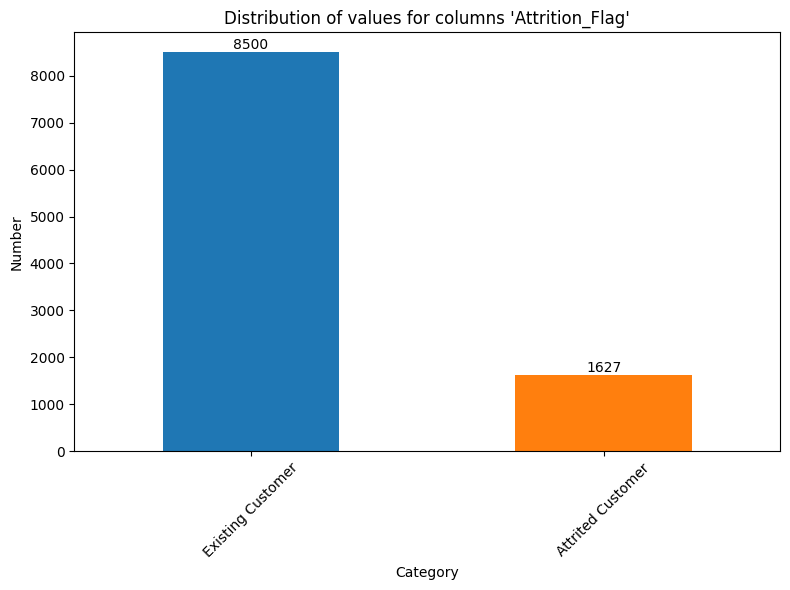

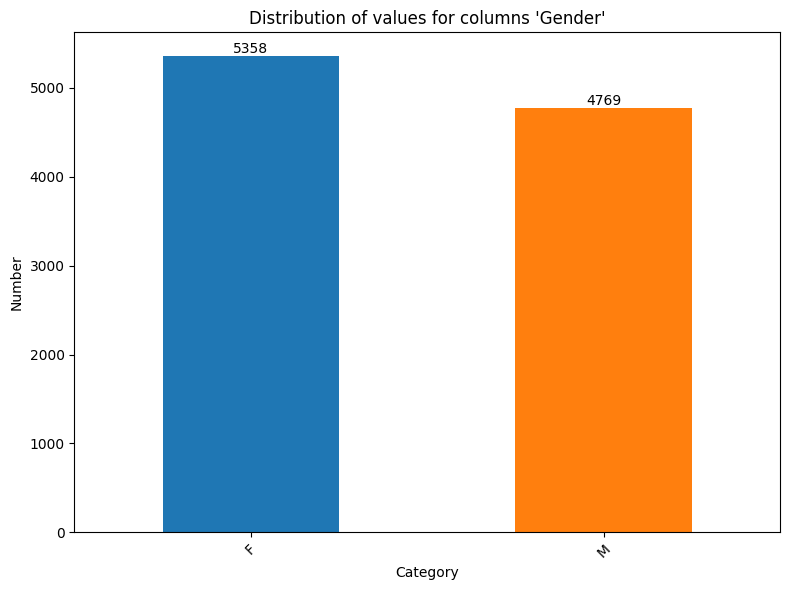

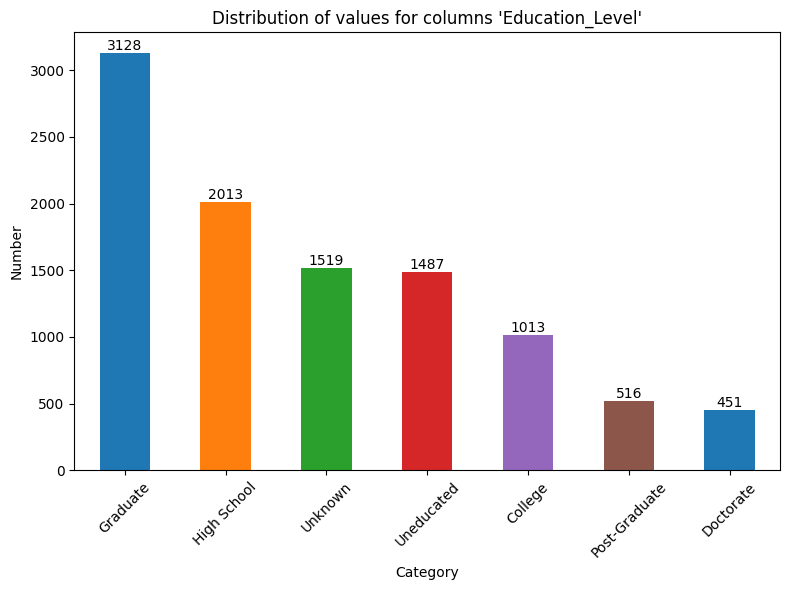

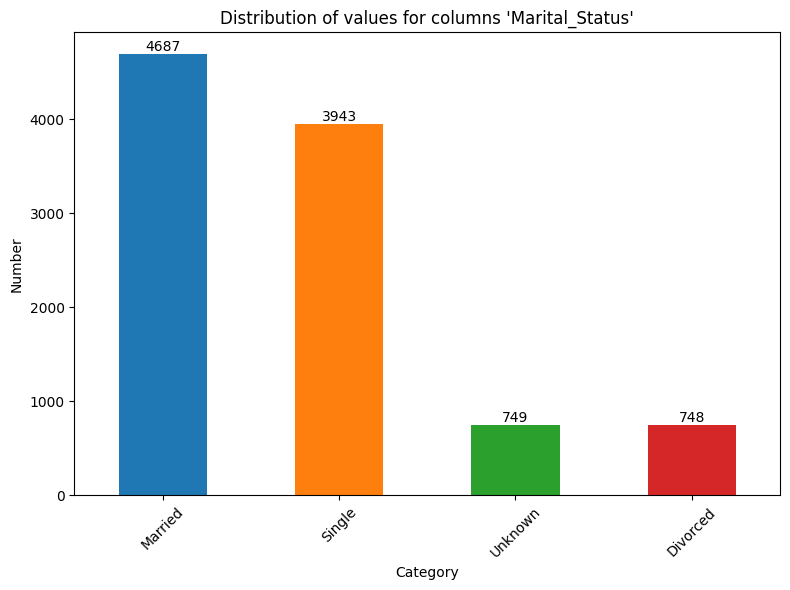

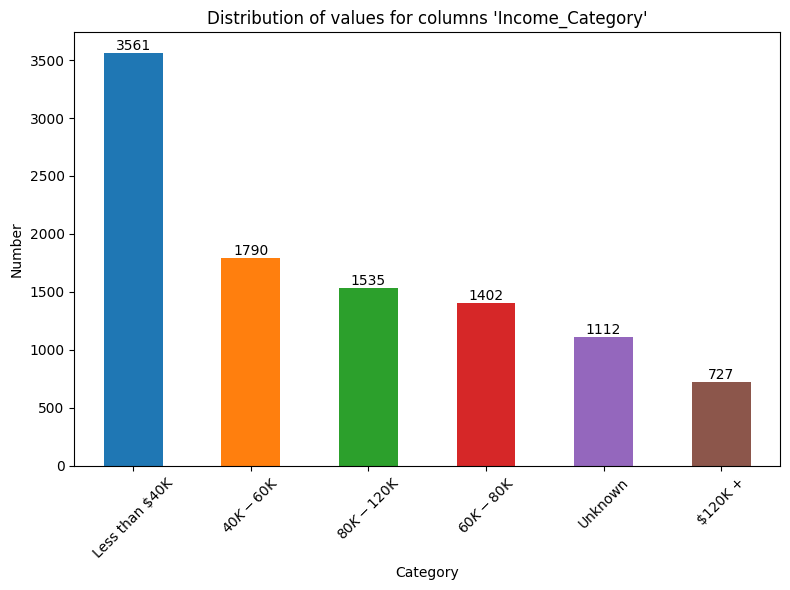

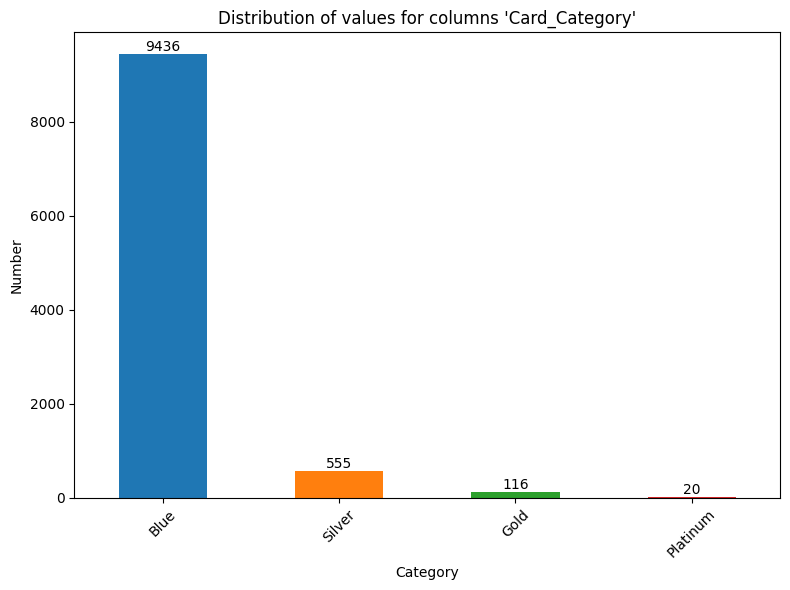

In [9]:
# Qualitative graphs
string_columns = df.select_dtypes(include=['category'])
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

for col in string_columns.columns:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar', color=custom_colors)

    for i, value in enumerate(df[col].value_counts()):
        plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

    plt.title(f"Distribution of values for columns '{col}'")
    plt.xlabel('Category')
    plt.ylabel('Number')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 1.2. Quantitative variables: <a class="anchor" id="section_1_2"></a>

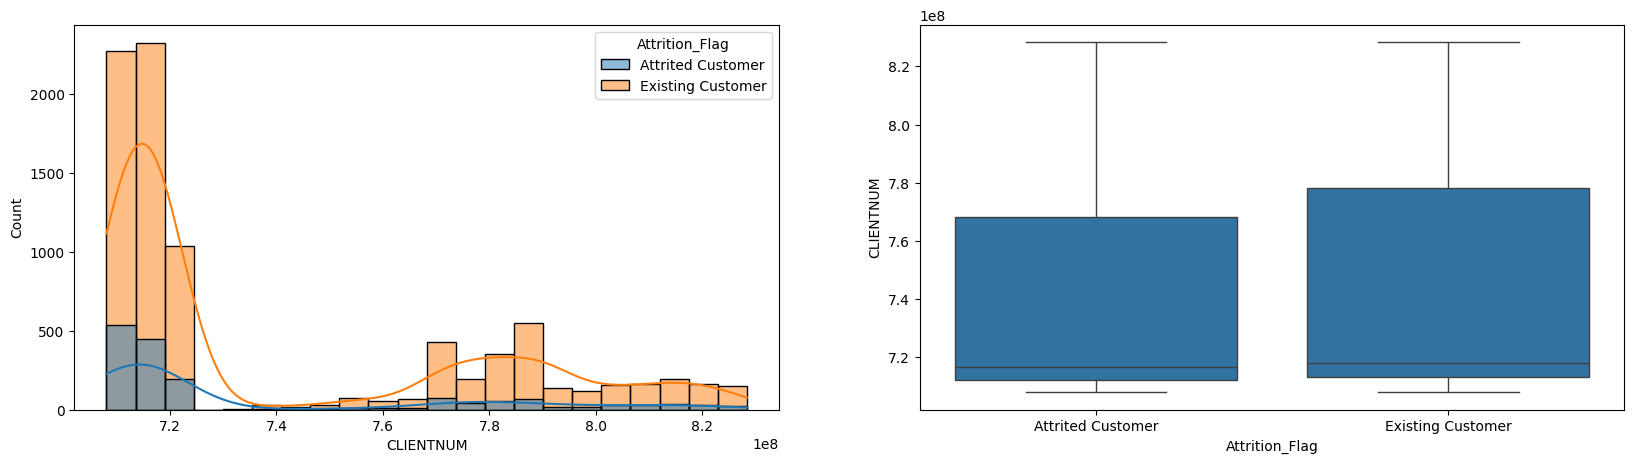

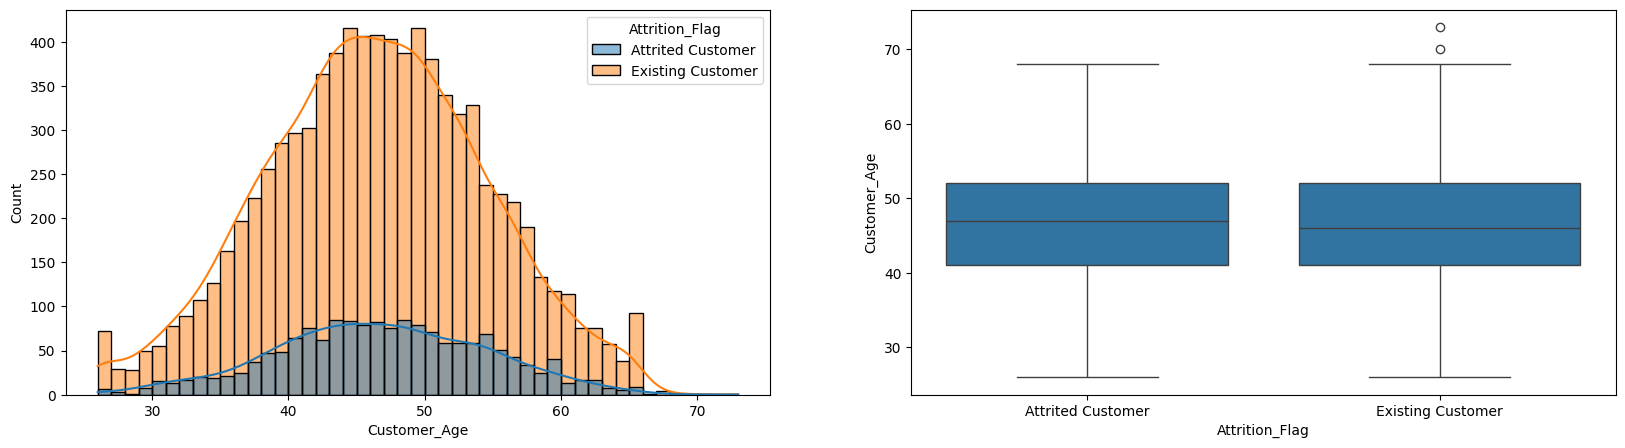

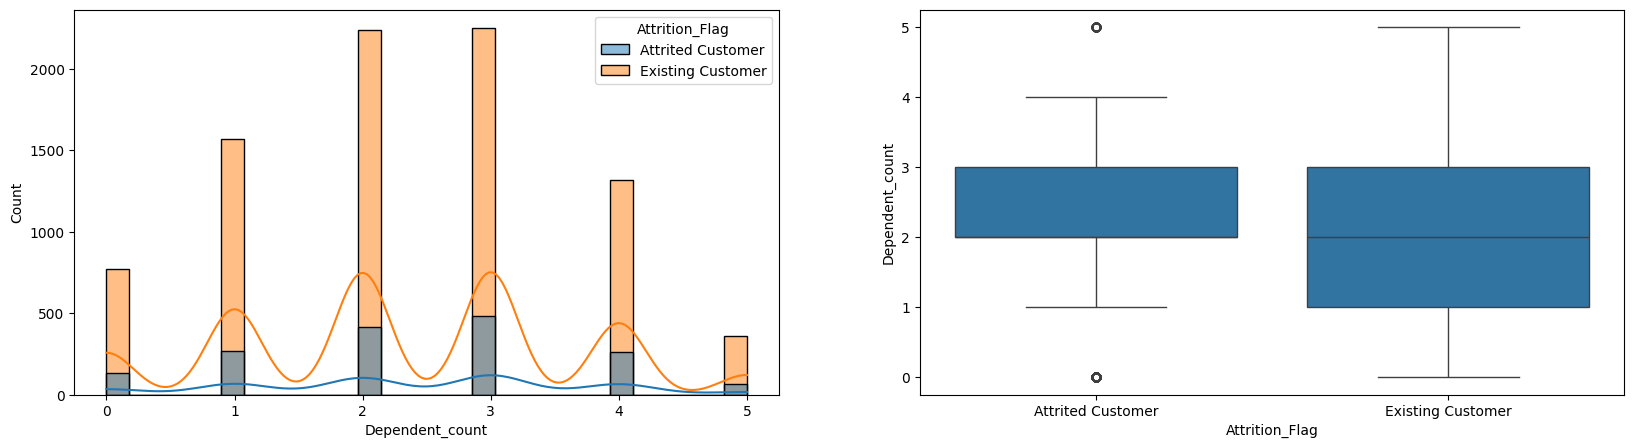

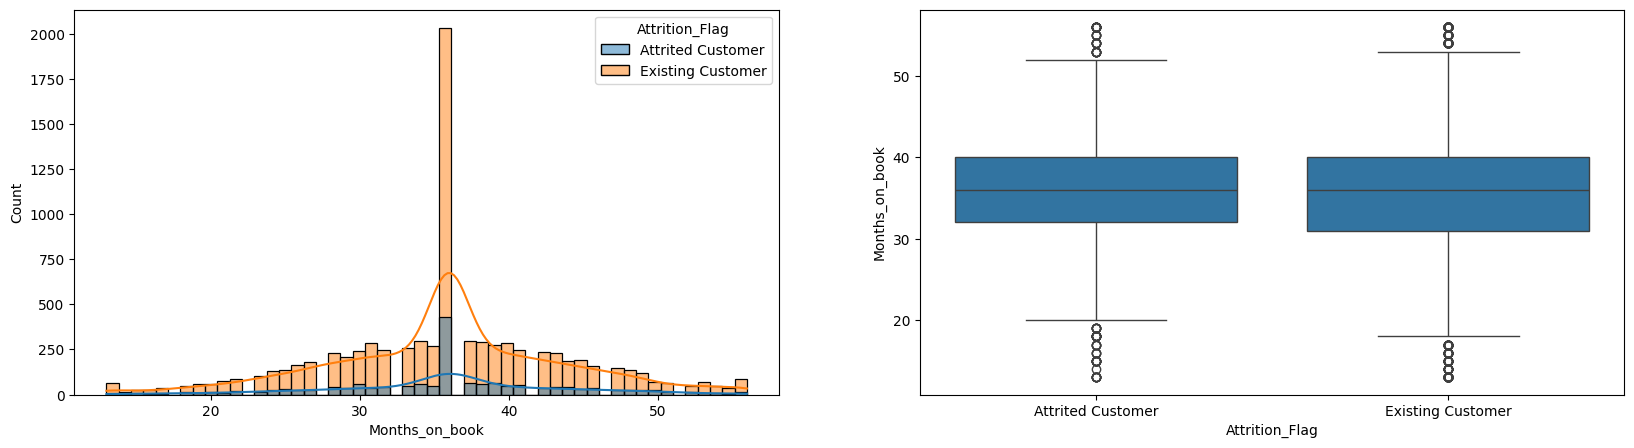

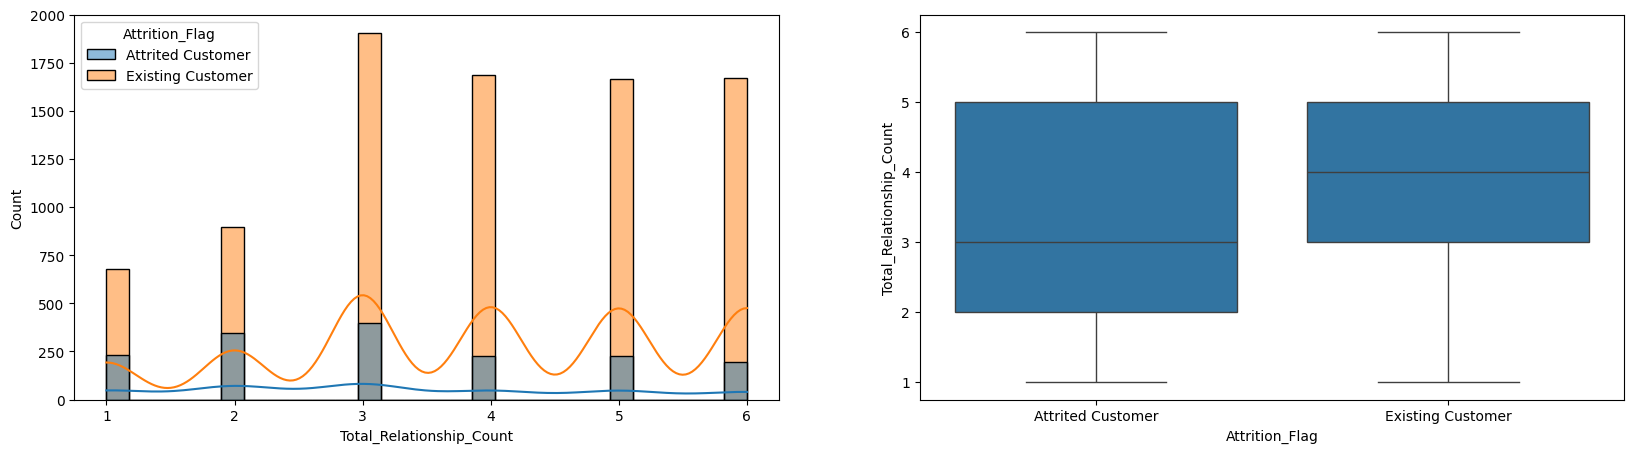

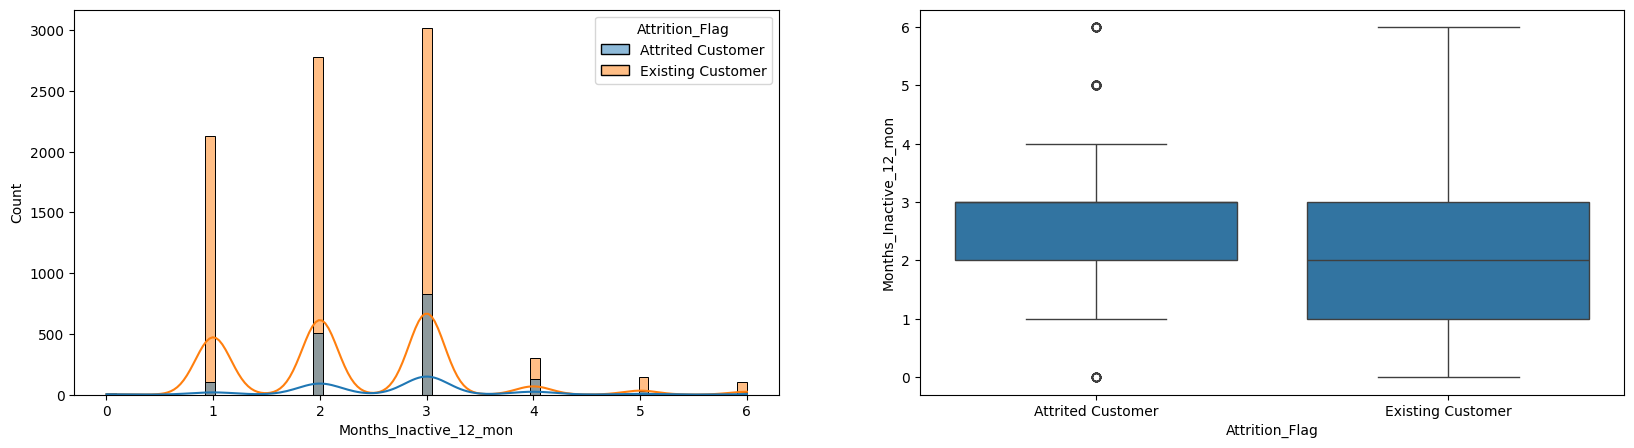

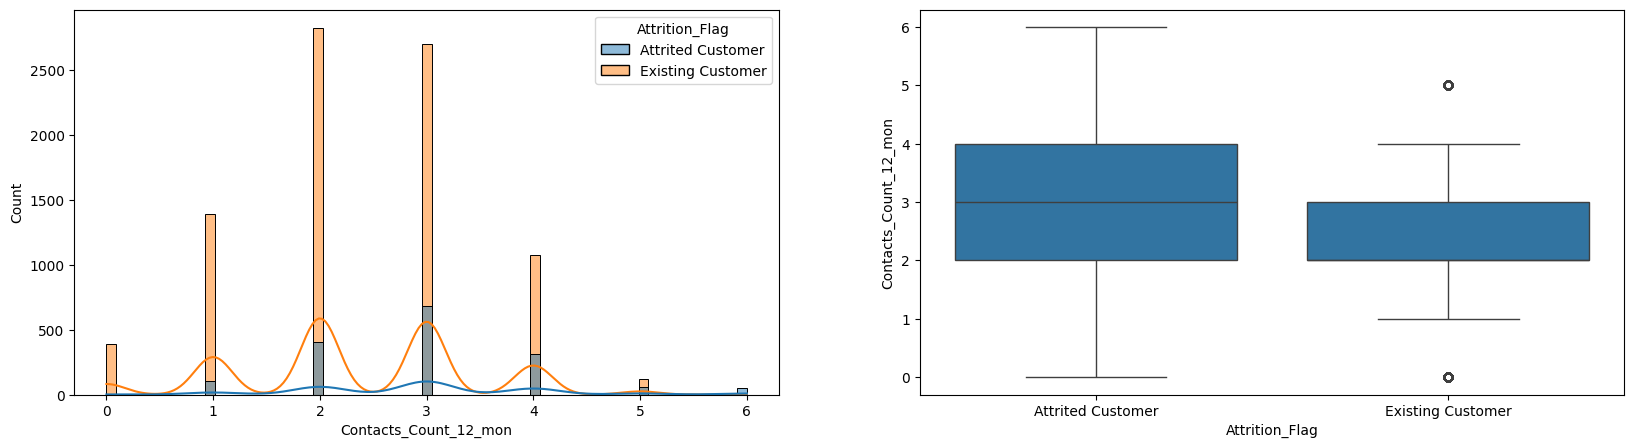

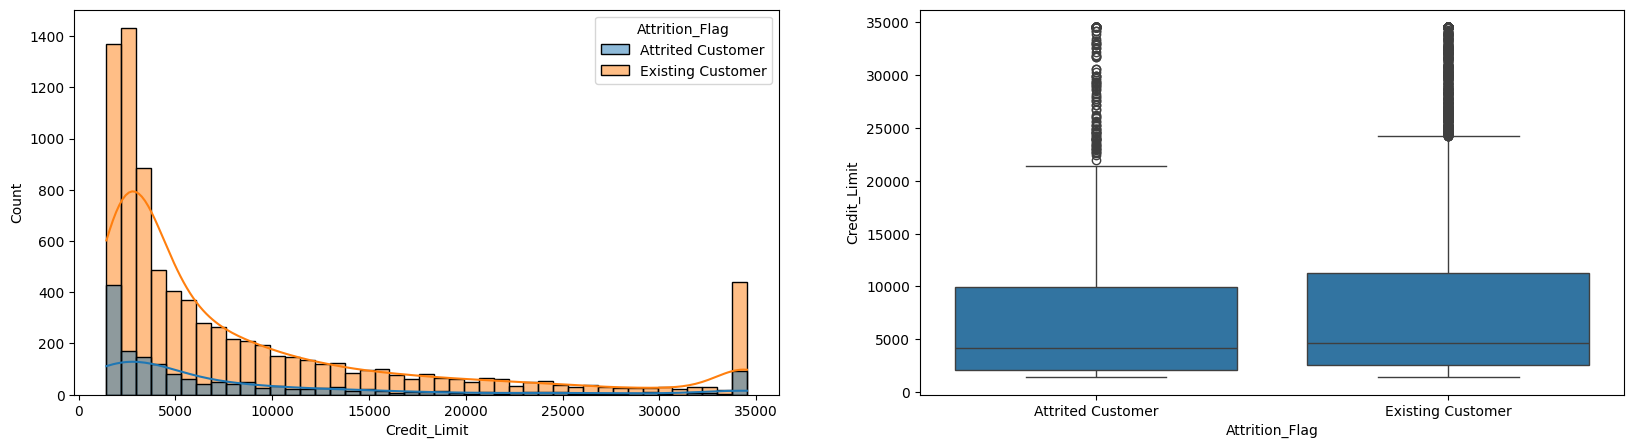

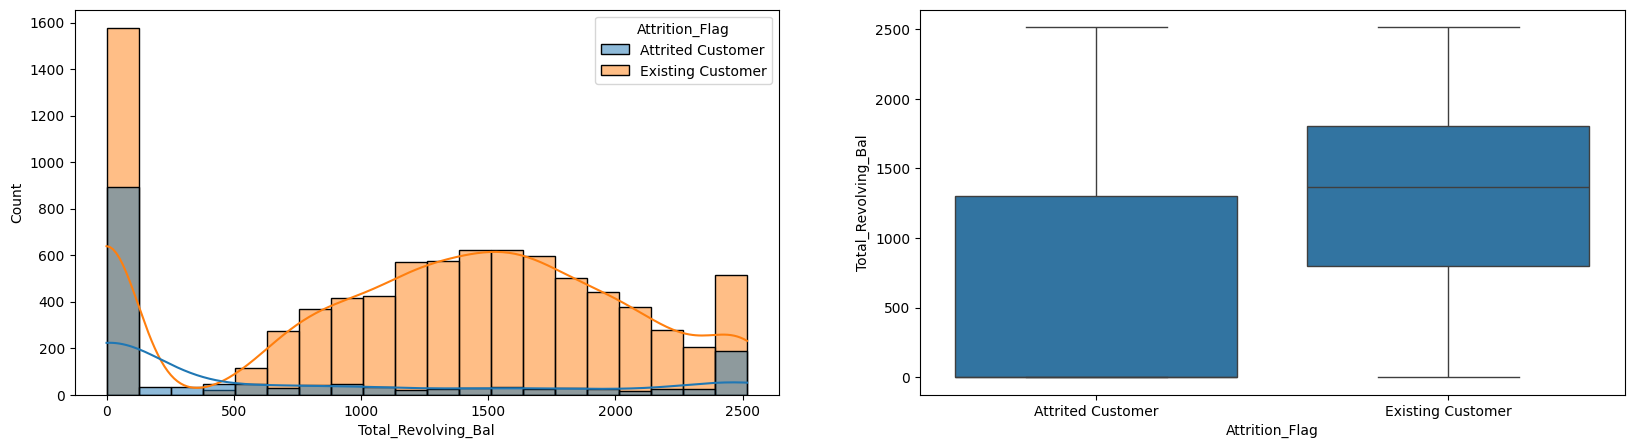

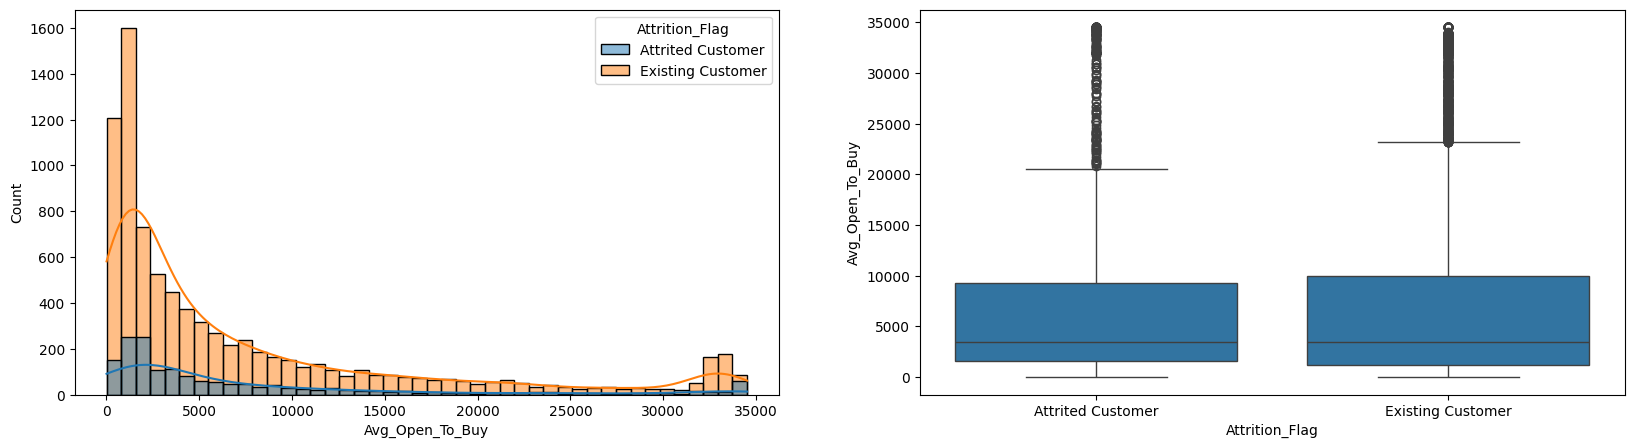

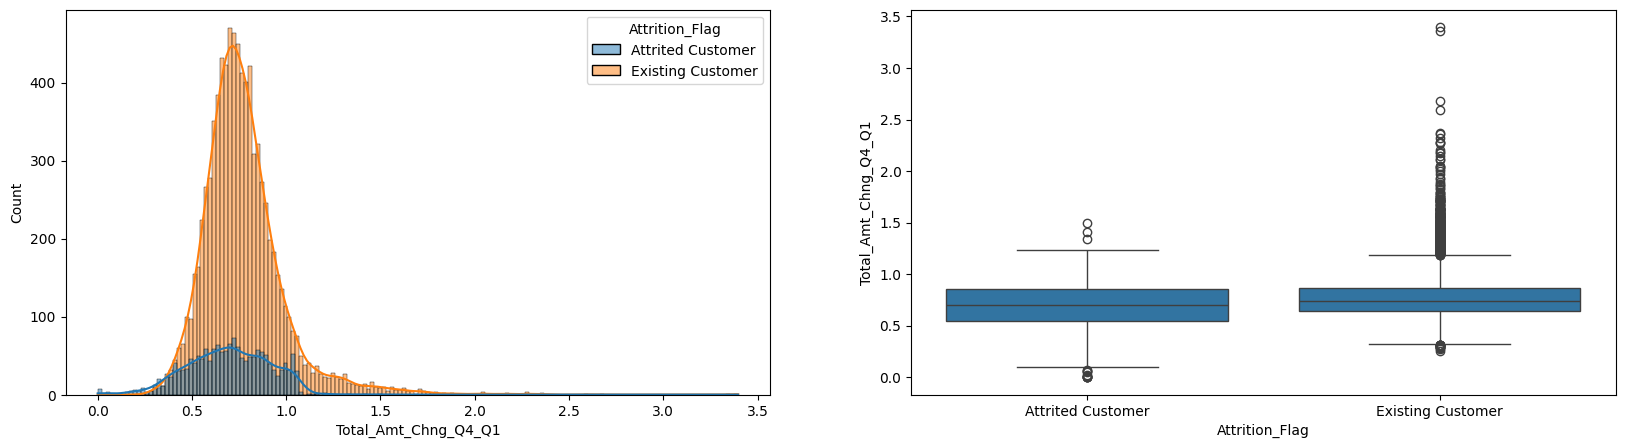

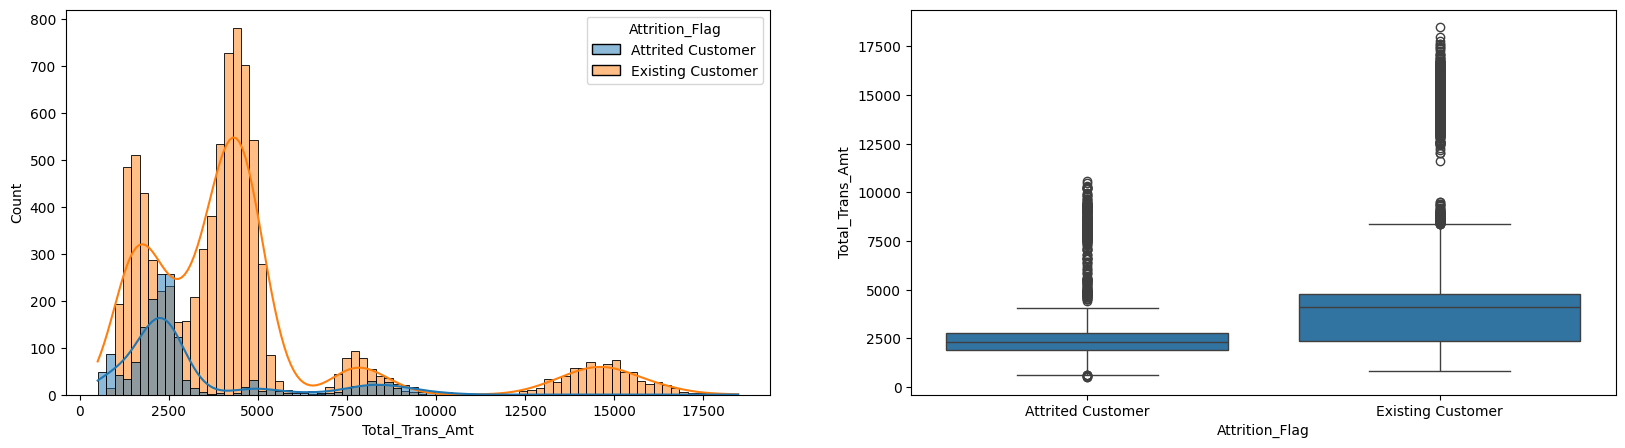

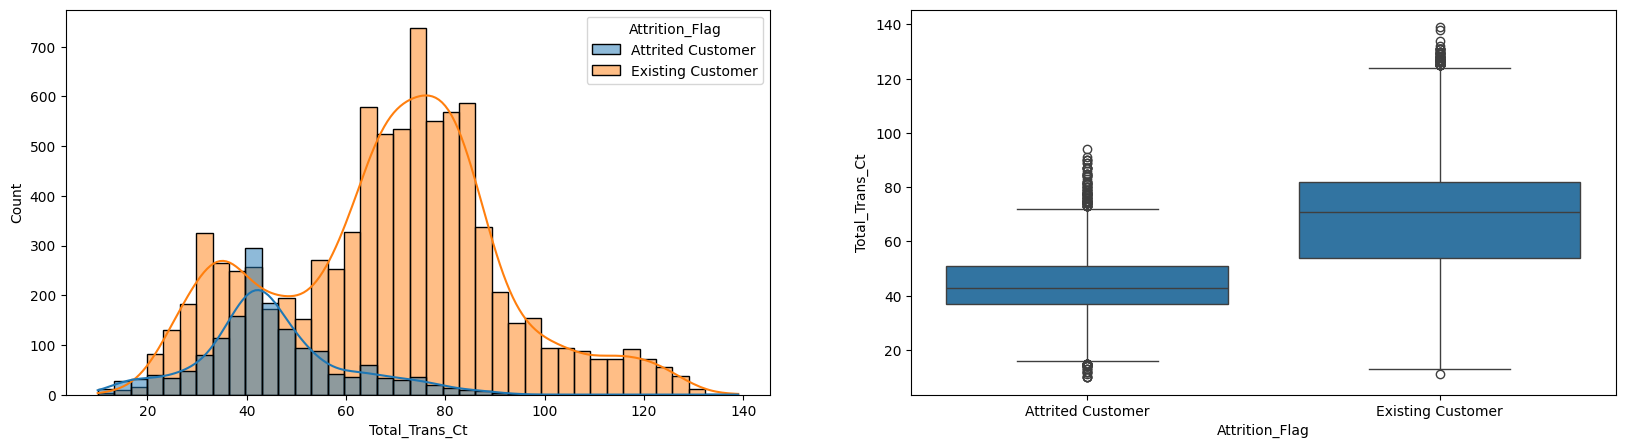

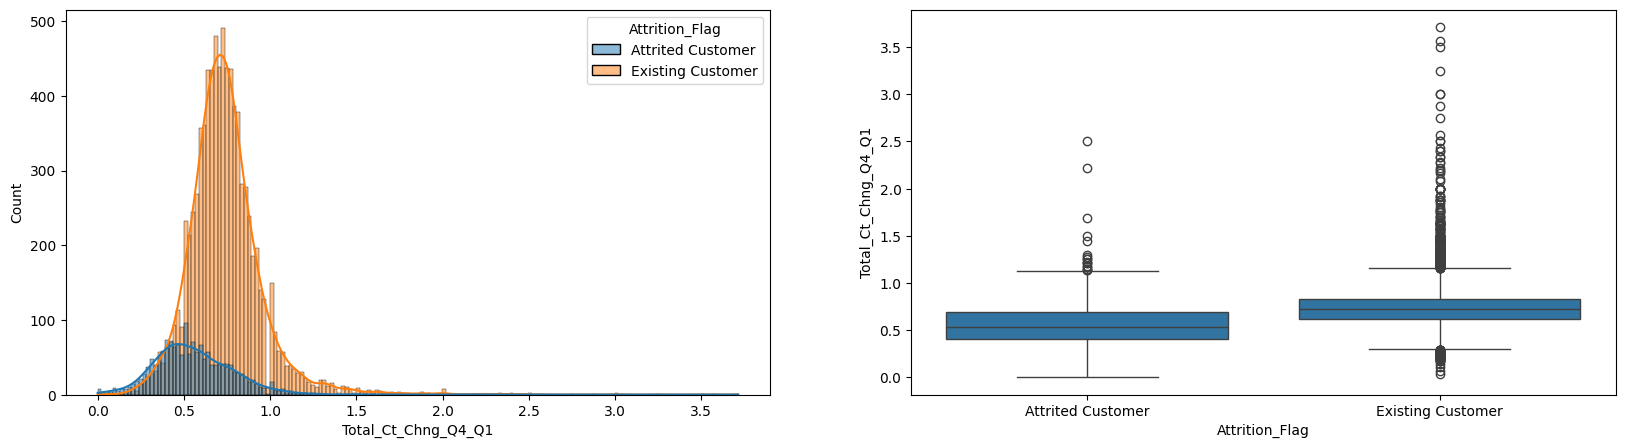

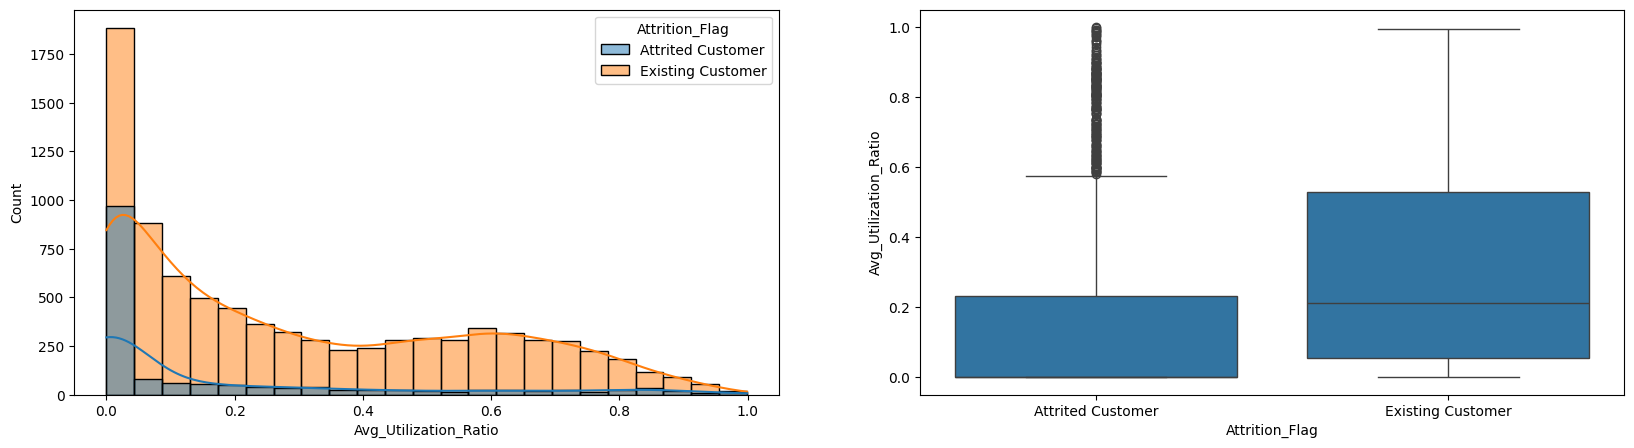

In [10]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

def plot_box(var):
    plt.subplot(1, 2, 1)  # Met le graphique à gauche de l'écran
    sns.histplot(data=df, x=var, hue='Attrition_Flag', kde=True)  # kde=True permet de mettre la densité
    
    plt.subplot(1, 2, 2)  # Met le graphique à droite de l'écran
    sns.boxplot(x='Attrition_Flag', y=var, data=df)
    
    plt.show()

for col in numeric_columns.columns:
    plt.figure(figsize=(20, 5))
    plot_box(col)

The distributions of the variables `Total_Revolving_Bal`, `Total_Trans_Ct`, `Total_Ct_Chng_Q4_Q1` and `Avg_Utilization_Ratio` indicate that these variables are potentially important for detecting customers likely to be in banking attrition.

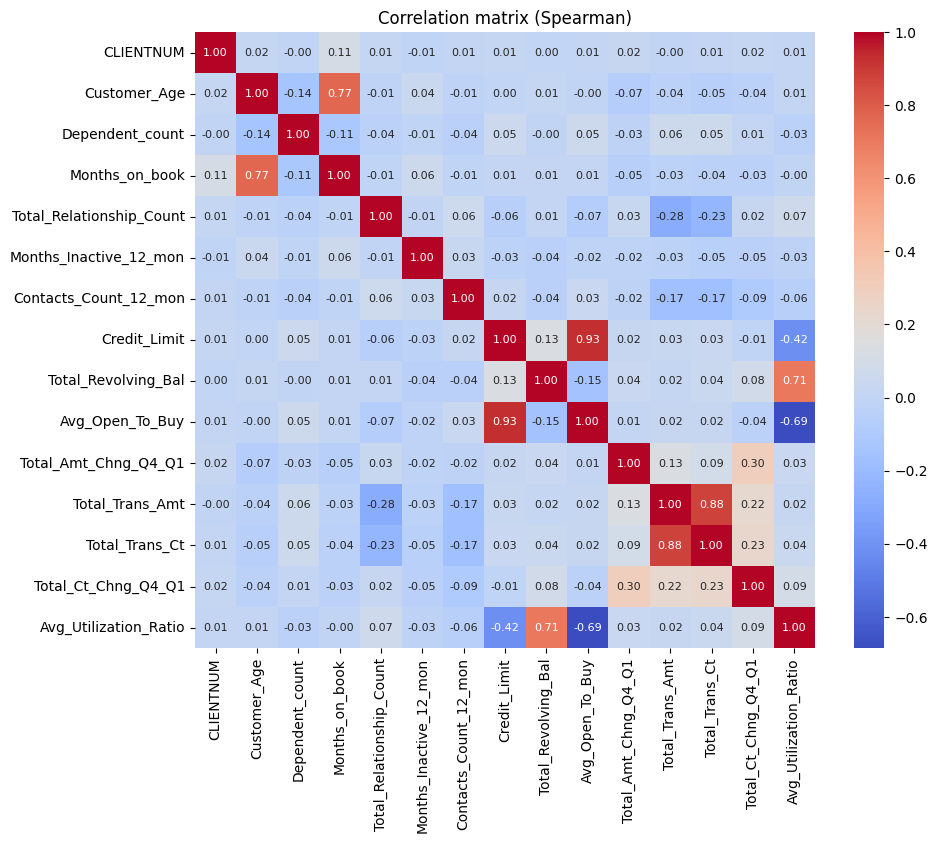

In [11]:
corr_matrix = numeric_columns.corr(method='spearman') 

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Correlation matrix (Spearman)')
plt.show()

The graph shows that certain variables appear to be correlated with each other:
***Month_on_book*** and ***Customer_Age*** => 0.77
***Total_Trans_Ct*** and ***Total_Trans_Amt*** => 0.88
***Total_Revolving_Bal*** and ***Avg_utilzation_Ratio*** => 0.71
***Avg_Open_To_Buy*** and ***Credit_Limit*** => 0.93

We'll see later if deleting certain variables is necessary to improve the model's performance. However, models based on decision trees aren't very sensitive to correlated variables, which should not pose any particular problems.

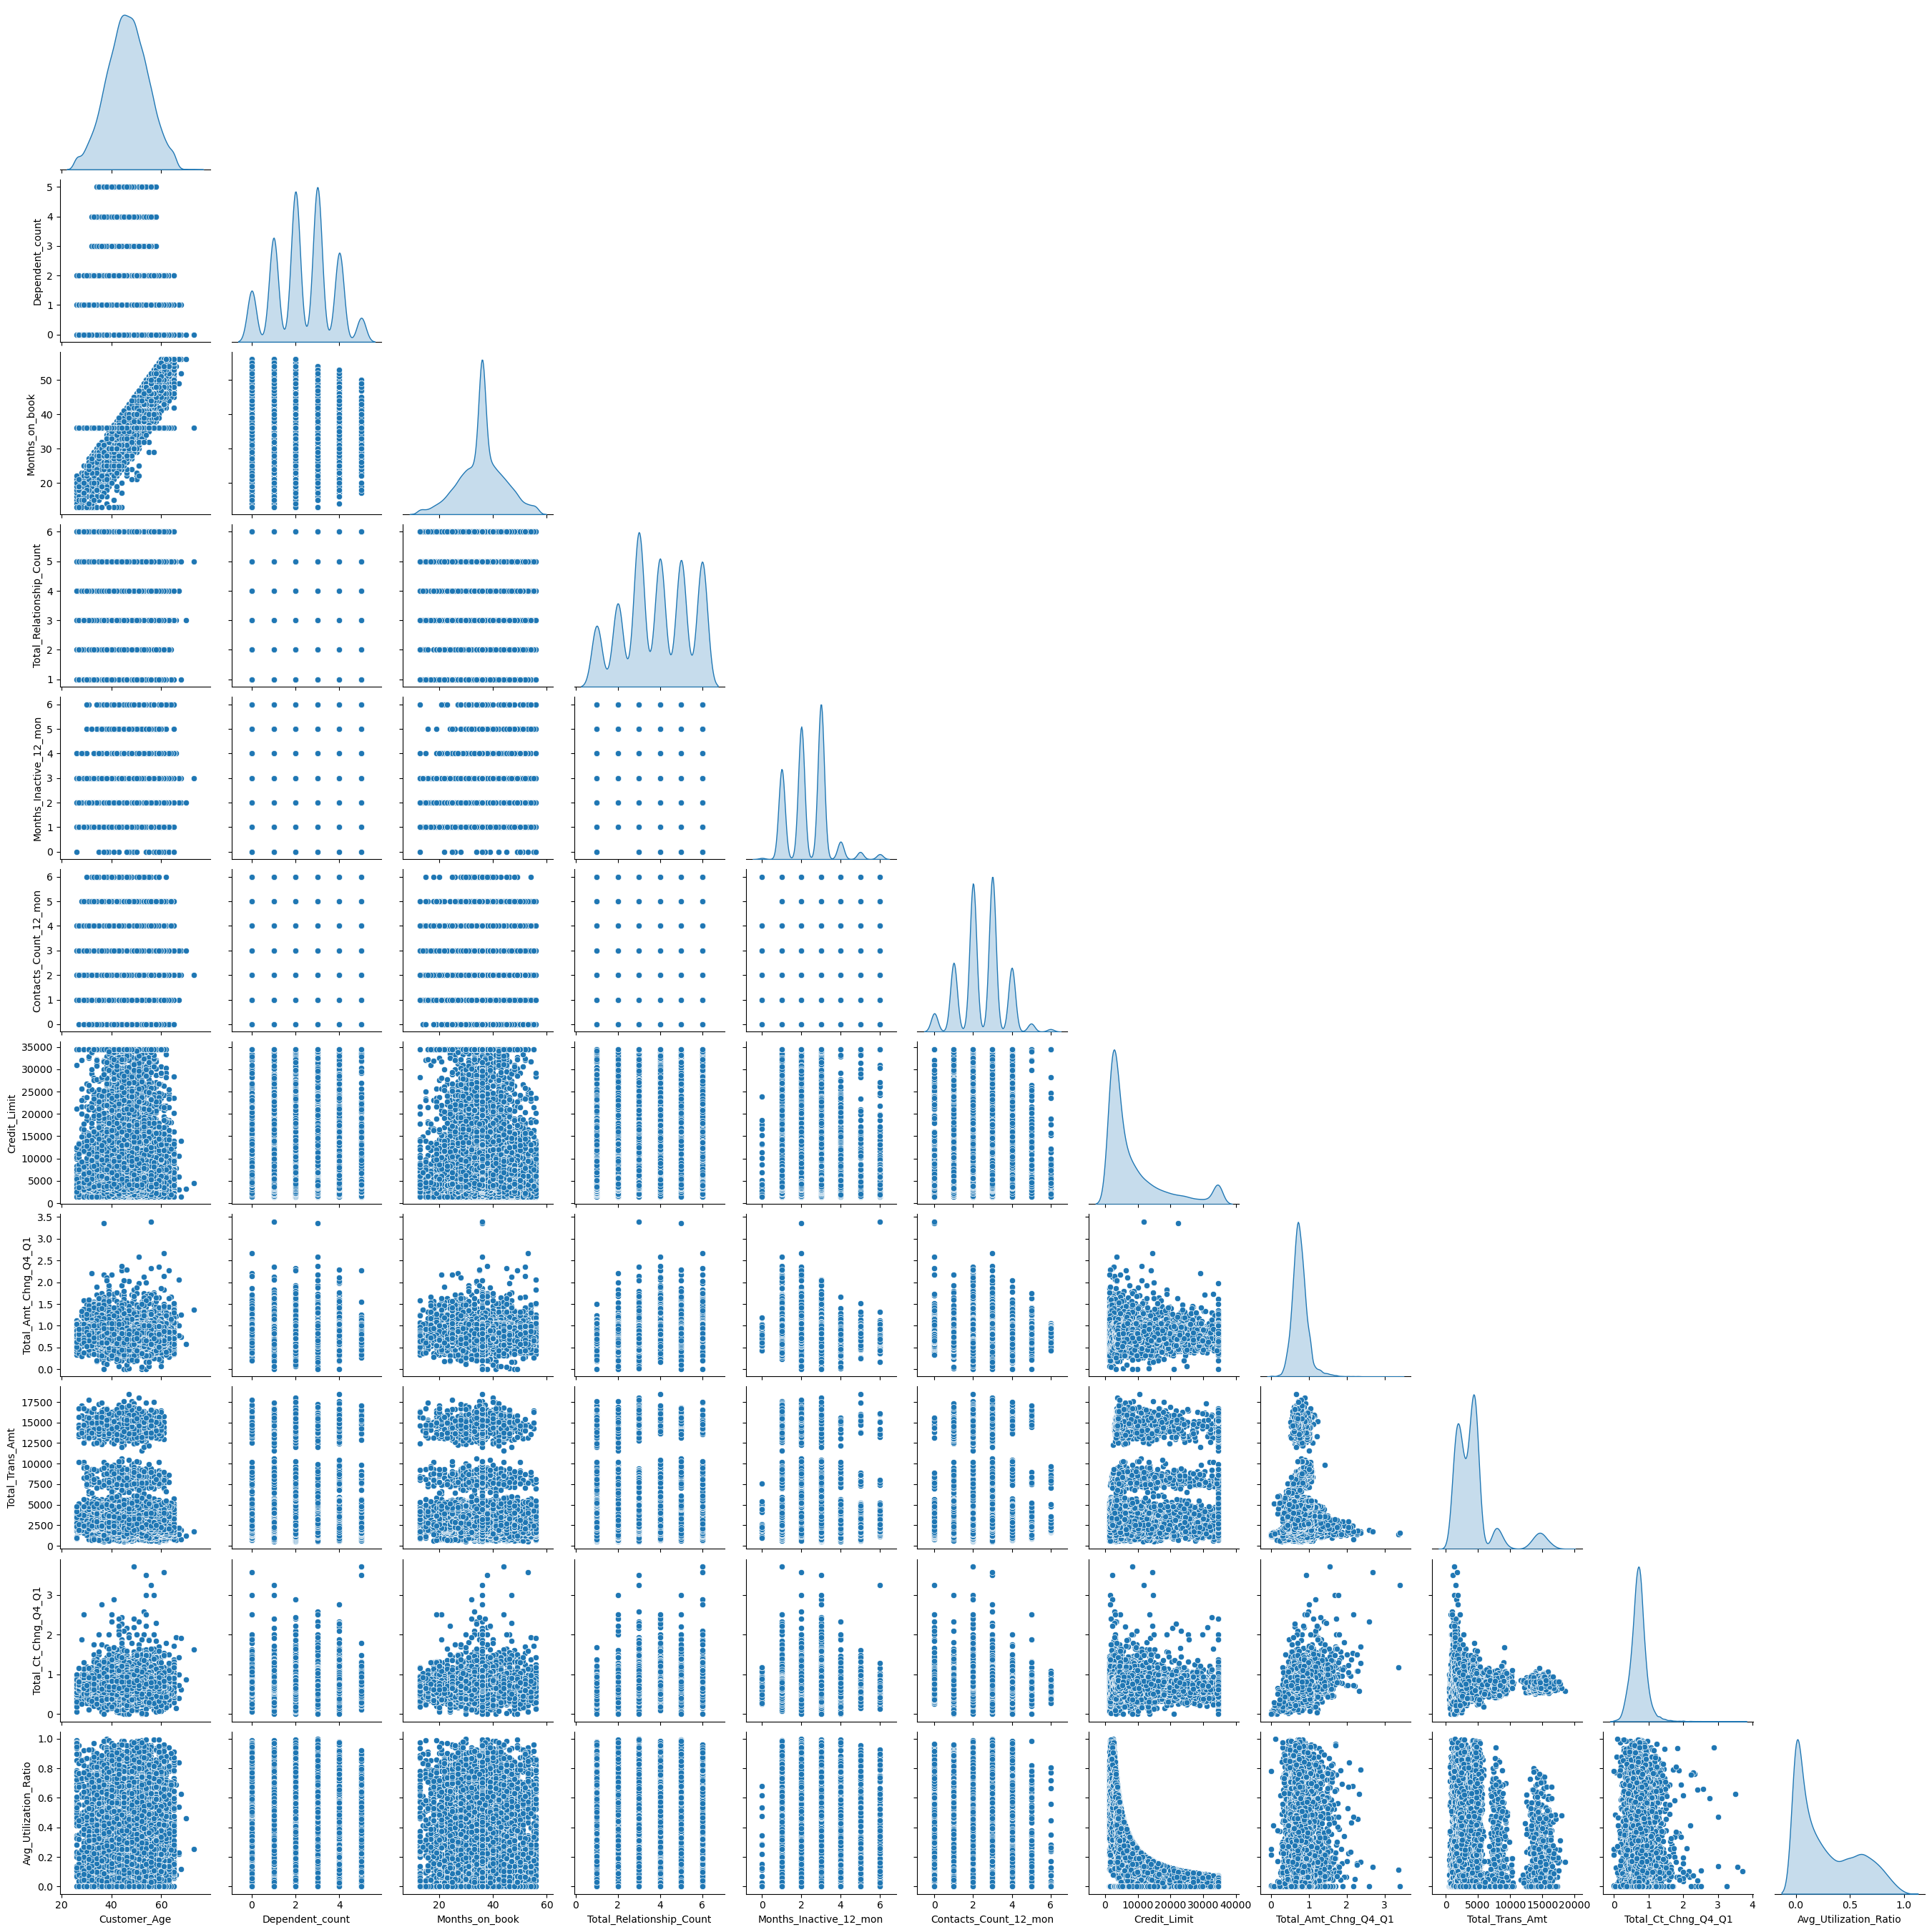

In [19]:
# Pairplot
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
sns.pairplot(numeric_columns, corner=True, diag_kind="kde")
plt.show()

# 2. Preprocessing
[Up](#up)

In [4]:
from sklearn.utils import resample
from abc import ABC, abstractmethod

class DataSplitter:
    """
    Class used to split data in trainset and testset
    """
    def __init__(self, df: pd.DataFrame, target: str):
        self.df = df
        self.target = target
        self.trainset = None
        self.testset = None

    def split_data(self, test_size=0.2, random_state=42):
        self.trainset, self.testset = train_test_split(self.df, test_size=test_size, random_state=random_state, stratify=self.df[self.target])
        return self.trainset, self.testset

class Preprocessor:
    """
    Class used to split data into X_train, X_test, y_train, and y_test. It also preprocesses the data.
    """
    def __init__(self, trainset: pd.DataFrame, testset: pd.DataFrame, target: str):
        self.trainset = trainset
        self.testset = testset
        self.target = target
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.preprocessor = None

    def split_features_target(self):
        self.X_train = self.trainset.drop(columns=[self.target])
        self.y_train = self.trainset[self.target]
        self.X_test = self.testset.drop(columns=[self.target])
        self.y_test = self.testset[self.target]
        return self.X_train, self.X_test, self.y_train, self.y_test

    def preprocess(self, numeric_features: list, categorical_features: list):
        cat_transformer = Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ])
        numeric_transformer = Pipeline(steps=[
            ('MinMAX', MinMaxScaler()), 
            ('quantil', QuantileTransformer())
        ])
        self.preprocessor = ColumnTransformer(
            transformers=[
                ('MinMax_Q', numeric_transformer, numeric_features),
                ('OHE', cat_transformer, categorical_features)
            ],
            remainder='passthrough'
        )
        pipeline = Pipeline(steps=[('preprocessor', self.preprocessor)])
        self.X_train = pipeline.fit_transform(self.X_train)
        self.X_test = pipeline.transform(self.X_test)

        return self.X_train, self.X_test

    def get_feature_names(self):
        if self.preprocessor is None:
            raise ValueError("Preprocessor has not been applied. Please run preprocess method first.")
        
        feature_names = self.preprocessor.get_feature_names_out()

        return feature_names

class Balancer(ABC):
    """ 
    Parent class to enforce child classes to implement the 'balance' function.
    """
    def __init__(self, trainset: pd.DataFrame, target: str):
        self.trainset = trainset
        self.target = target

    @abstractmethod
    def balance(self, ratio=1.0):
        pass

class UnderSampler(Balancer):
    """
    Deal with imbalanced datasets.
    """
    def balance(self, ratio=1.0):
        majority_class = self.trainset[self.trainset[self.target] == self.trainset[self.target].value_counts().idxmax()]
        minority_class = self.trainset[self.trainset[self.target] == self.trainset[self.target].value_counts().idxmin()]
        n_majority = int(len(minority_class) * ratio)
        majority_class_undersampled = resample(majority_class, replace=False, n_samples=n_majority, random_state=42)
        balanced_df = pd.concat([minority_class, majority_class_undersampled])
        return balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

class OverSampler(Balancer):
    """
    Deal with imbalanced datasets.
    """
    def balance(self, ratio=1.0):
        majority_class = self.trainset[self.trainset[self.target] == self.trainset[self.target].value_counts().idxmax()]
        minority_class = self.trainset[self.trainset[self.target] == self.trainset[self.target].value_counts().idxmin()]
        n_minority = int(len(majority_class) * ratio)
        minority_class_oversampled = resample(minority_class, replace=True, n_samples=n_minority, random_state=42)
        balanced_df = pd.concat([majority_class, minority_class_oversampled])
        return balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [5]:
# Data split
target = 'Attrition_Flag'

splitter = DataSplitter(df, target)
trainset, testset = splitter.split_data()

In [6]:
print(trainset[target].value_counts(normalize=True))
print()
print(trainset[target].value_counts())

Attrition_Flag
Existing Customer    0.839279
Attrited Customer    0.160721
Name: proportion, dtype: float64

Attrition_Flag
Existing Customer    6799
Attrited Customer    1302
Name: count, dtype: int64


In [7]:
# Train test split
preprocessor = Preprocessor(trainset, testset, target) 
X_train, X_test, y_train, y_test = preprocessor.split_features_target()

In [8]:
# Preprocessing
numeric_features = X_train.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['category', 'object']).columns.tolist()

X_train_trans, X_test_trans = preprocessor.preprocess(numeric_features=numeric_features, categorical_features=categorical_features)

In [9]:
X_train_trans.shape, X_test_trans.shape, y_train.shape, y_test.shape

((8101, 38), (2026, 38), (8101,), (2026,))

In [10]:
# Get feature names
feature_names = preprocessor.get_feature_names()
feature_names

array(['MinMax_Q__CLIENTNUM', 'MinMax_Q__Customer_Age',
       'MinMax_Q__Dependent_count', 'MinMax_Q__Months_on_book',
       'MinMax_Q__Total_Relationship_Count',
       'MinMax_Q__Months_Inactive_12_mon',
       'MinMax_Q__Contacts_Count_12_mon', 'MinMax_Q__Credit_Limit',
       'MinMax_Q__Total_Revolving_Bal', 'MinMax_Q__Avg_Open_To_Buy',
       'MinMax_Q__Total_Amt_Chng_Q4_Q1', 'MinMax_Q__Total_Trans_Amt',
       'MinMax_Q__Total_Trans_Ct', 'MinMax_Q__Total_Ct_Chng_Q4_Q1',
       'MinMax_Q__Avg_Utilization_Ratio', 'OHE__Gender_F',
       'OHE__Gender_M', 'OHE__Education_Level_College',
       'OHE__Education_Level_Doctorate', 'OHE__Education_Level_Graduate',
       'OHE__Education_Level_High School',
       'OHE__Education_Level_Post-Graduate',
       'OHE__Education_Level_Uneducated', 'OHE__Education_Level_Unknown',
       'OHE__Marital_Status_Divorced', 'OHE__Marital_Status_Married',
       'OHE__Marital_Status_Single', 'OHE__Marital_Status_Unknown',
       'OHE__Income_Category

In [11]:
# Intermediate dataframe for keeping the names of associated columns
X_train_trans_df = pd.DataFrame(X_train_trans, columns=feature_names).drop(["MinMax_Q__CLIENTNUM"], axis=1)
X_test_trans_df = pd.DataFrame(X_test_trans, columns=feature_names).drop(["MinMax_Q__CLIENTNUM"], axis=1)

In [12]:
# Final data before modeling
X_train_trans = np.array(X_train_trans_df)
X_test_trans = np.array(X_test_trans_df)

y_train = y_train.map({'Attrited Customer': 1, 'Existing Customer': 0})
y_test = y_test.map({'Attrited Customer': 1, 'Existing Customer': 0})

In [15]:
X_train_trans.shape, X_test_trans.shape

((8101, 37), (2026, 37))

# 3. Modeling
[Up](#table-of-contents)
## 3.1. Evaluation procedure

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, f1_score, RocCurveDisplay
from sklearn.utils import resample
import optuna
from collections import Counter
from optuna.samplers import TPESampler

class ModelEvaluator:
    """ 
    A class in which several models can be evaluated to identify the best performers.
    """
    def __init__(self, models, X_train, y_train, X_test, y_test, cv_splits=3, sample_size=0.1):
        self.models = models
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.cv_splits = cv_splits
        self.sample_size = sample_size
        self.scores = {"precision": {}, "recall": {}, "f1": {}}
   
    def evaluate_models(self):
        X_train, y_train = self._get_sampled_data()
       
        for name, model in self.models.items():
            print(f"Evaluating {name}...")
            model.fit(X_train, y_train)
            self._evaluate_model(name, model)
       
    def _get_sampled_data(self):
        if self.sample_size < 1.0:
            return resample(self.X_train, self.y_train,
                            n_samples=int(len(self.X_train) * self.sample_size),
                            random_state=42)
        return self.X_train, self.y_train

    def _evaluate_model(self, name, model):
        precision_scores = cross_val_score(model, self.X_train, self.y_train,
                                           cv=self.cv_splits, scoring='precision', n_jobs=-1)
        recall_scores = cross_val_score(model, self.X_train, self.y_train,
                                        cv=self.cv_splits, scoring='recall', n_jobs=-1)
        f1_scores = cross_val_score(model, self.X_train, self.y_train,
                                    cv=self.cv_splits, scoring='f1', n_jobs=-1)
       
        self.scores["precision"][name] = precision_scores
        self.scores["recall"][name] = recall_scores
        self.scores["f1"][name] = f1_scores
       
        y_pred = model.predict(self.X_test)
        print(confusion_matrix(self.y_test, y_pred))
        print(classification_report(self.y_test, y_pred))
       
    def plot_results(self):
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
       
        self._plot_scores(axes[0], 'Precision Scores', 'precision')
        self._plot_scores(axes[1], 'Recall Scores', 'recall')
        self._plot_scores(axes[2], 'F1 Scores', 'f1')
       
        plt.tight_layout()
        plt.show()

    def _plot_scores(self, ax, title, score_type):
        ax.boxplot(self.scores[score_type].values(), labels=self.scores[score_type].keys())
        ax.set_title(title)
        ax.set_ylabel('Score')
 
class FeatureImportanceAnalyzer:
    """ 
    Class for recovering important variables from models previously tested by TOP(n).
    """
    def __init__(self, models, X_train):
        self.models = models
        self.X_train = X_train
        self.feature_importances = {model: {} for model in models.keys()}
   
    def analyze_feature_importance(self):
        for name, model in self.models.items():
            importances = self._get_feature_importances(model)
            if importances is not None:
                self.feature_importances[name] = self._get_top_features(importances)
       
    def _get_feature_importances(self, model):
        if hasattr(model, 'feature_importances_'):
            return model.feature_importances_
        elif hasattr(model, 'coef_'):
            return model.coef_[0]
        return None

    def _get_top_features(self, importances):
        sorted_indices = np.argsort(importances)[::-1]
        top_features = sorted_indices[:10]
        return {self.X_train.columns[i]: importances[i] for i in top_features}
       
    def plot_feature_importance(self):
        all_importances = self._aggregate_feature_importances()
        feature_names, counts = zip(*all_importances.most_common())
       
        plt.figure(figsize=(12, 8))
        plt.barh(feature_names, counts)
        plt.xlabel('Importance Count')
        plt.ylabel('Features')
        plt.title('Most Important Features Across Models')
        plt.gca().invert_yaxis()
        plt.show()

    def _aggregate_feature_importances(self):
        all_importances = Counter()
        for importances in self.feature_importances.values():
            for feature in importances:
                all_importances[feature] += 1
        return all_importances

class ModelAnalyzer:
    """ 
    Class used to analyse a model in depth.
    """
    def __init__(self, model, X_train, y_train, X_test, y_test):
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.df_results = pd.DataFrame()
        self.y_pred = None
        self.y_probs = None
        self.y_pred_new = None

    def _fit_model(self):
        self.model.fit(self.X_train, self.y_train)
        self.y_pred = self.model.predict(self.X_test)
        self.y_probs = self._get_prediction_scores(self.X_test)

    def _get_prediction_scores(self, X):
        if hasattr(self.model, 'predict_proba'):
            return self.model.predict_proba(X)[:, 1]
        elif hasattr(self.model, 'decision_function'):
            return self.model.decision_function(X)
        raise AttributeError("Model does not support 'predict_proba' or 'decision_function'.")

    def fit(self):
        self._fit_model()
        print(confusion_matrix(self.y_test, self.y_pred))
        print(classification_report(self.y_test, self.y_pred))

    def evaluation(self):
        self._fit_model()
        print(confusion_matrix(self.y_test, self.y_pred))
        print(classification_report(self.y_test, self.y_pred))

        skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)
        N, train_score, val_score = learning_curve(self.model, self.X_train, self.y_train,
                                                   cv=skf, scoring='precision',
                                                   train_sizes=np.linspace(0.1, 1, 10))

        plt.figure(figsize=(12, 8))
        plt.plot(N, train_score.mean(axis=1), label='Train Score')
        plt.plot(N, val_score.mean(axis=1), label='Validation Score')
        plt.legend()
        plt.xlabel('Training Size')
        plt.ylabel('Score')
        plt.title('Learning Curve')
        plt.show()

        y_prob_train = self._get_prediction_scores(self.X_train)

        roc1 = RocCurveDisplay.from_predictions(self.y_test, self.y_probs, name="Testset")
        RocCurveDisplay.from_predictions(self.y_train, y_prob_train, name="Trainset", ax=roc1.ax_)

        plt.show()

    def calculate_top_predictions(self, top_percent=20):
        y_probs = self._get_prediction_scores(self.X_test)
        self.df_results = pd.DataFrame({'y_probs': y_probs, 'true': self.y_test})

        df_results_sorted = self.df_results.sort_values(by='y_probs', ascending=False)
        top_n = int(len(df_results_sorted) * top_percent / 100)
        top_pred = df_results_sorted.head(top_n)
        nb_true_pos = top_pred[top_pred['true'] == 1].shape[0]
        percent_true_pos = round(nb_true_pos / top_pred.shape[0] * 100, 2)
       
        print(f'Parmi les {top_percent}% de meilleures probabilités, {percent_true_pos}% de clients sont réellement souscripteurs')
        return top_pred

    def get_pred_probs(self):
        return self.df_results
   
    def create_lift_table(self, num_segments=10):
        y_probs = self._get_prediction_scores(self.X_test)
        data = pd.DataFrame({'y_true': self.y_test, 'y_probs': y_probs})
        data = data.sort_values(by='y_probs', ascending=False).reset_index(drop=True)
 
        data["rank"] = np.arange(1, len(data) + 1)
        data["segment"] = pd.qcut(data['rank'], num_segments, labels=False)
        data['y_true'] = data['y_true'].astype(int)
 
        lift_table = data.groupby('segment').agg({'y_true': ['sum', 'count']}).reset_index()
        lift_table.columns = ["segment", "sum_y_true", "count"]
 
        lift_table['cum_sub'] = lift_table['sum_y_true'].cumsum()
        lift_table["cum_pop"] = lift_table['count'].cumsum() / len(data)
 
        initial_point = pd.DataFrame({'segment': [-1], 'sum_y_true': [0], 'count': [0], 'cum_sub': [0], 'cum_pop': [0]})
        lift_table = pd.concat([initial_point, lift_table]).reset_index(drop=True)
 
        lift_table['perc_sub_capt_relatif'] = lift_table['cum_sub'] / lift_table['count'].cumsum()
        lift_table['perc_sub_capt'] = lift_table['cum_sub'] / data['y_true'].sum()
 
        plt.figure(figsize=(10, 6))
        x = lift_table["cum_pop"]
        y = lift_table["perc_sub_capt"]
       
        plt.plot(x, y, marker='o', label='Courbe lift')
        plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Aléatoire')
       
        plt.axvline(x=0.2, c='m', linestyle='--', label='20% population')
 
        # Find the index of the closest value to 0.2
        closest_index = (lift_table["cum_pop"] - 0.2).abs().idxmin()
        lift_20_pop = lift_table.iloc[closest_index]
        lift_20 = lift_20_pop["perc_sub_capt_relatif"] / lift_table["perc_sub_capt_relatif"].iloc[-1]
        plt.text(0.22, 0.5, f"Lift 20% = {lift_20:.2f}", color="m")
 
        plt.title('Courbe lift')
        plt.xlabel('% population')
        plt.ylabel('% souscripteurs capturés')
        plt.legend()
        plt.grid(True)
        plt.show()
           
        return lift_table
    
    def plot_precision_recall_curve(self):
        self._fit_model()
        precision, recall, thresholds = precision_recall_curve(self.y_test, self.y_probs)

        plt.figure(figsize=(12, 6))
        plt.plot(thresholds, precision[:-1], label='Precision')
        plt.plot(thresholds, recall[:-1], label='Recall')
        plt.xlabel('Threshold')
        plt.ylabel('Score')
        plt.title('Precision-Recall Curve')
        plt.legend()
        plt.grid(True)
        plt.show()

        f1_scores = (2 * precision * recall) / (precision + recall)
        best_index = np.argmax(f1_scores)
        best_threshold = thresholds[best_index]
        best_f1 = f1_scores[best_index]

        print(f'Best Threshold: {best_threshold:.2f}, Best F1 Score: {best_f1:.2f}')

        y_pred = self.y_probs > best_threshold
        self.y_pred_new = y_pred
        print("F1 Score final:", f1_score(self.y_test, y_pred))
 
    def get_new_y_pred(self):
        return self.y_pred_new

In [119]:
# Tests of few models
models = {
    'GB': GradientBoostingClassifier(random_state=42),
    'XGB': xgb.XGBClassifier(random_state=42, n_jobs=-1),
    'Ada': AdaBoostClassifier(random_state=42),
    'RF': RandomForestClassifier(random_state=42),
    'LR': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(random_state=42)
    }

In [120]:
# Evaluation
evaluator = ModelEvaluator(models, X_train_trans, y_train, X_test_trans, y_test, cv_splits=5, sample_size=1)
evaluator.evaluate_models()

Evaluating GB...
[[1679   22]
 [  49  276]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1701
           1       0.93      0.85      0.89       325

    accuracy                           0.96      2026
   macro avg       0.95      0.92      0.93      2026
weighted avg       0.96      0.96      0.96      2026

Evaluating XGB...
[[1677   24]
 [  33  292]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1701
           1       0.92      0.90      0.91       325

    accuracy                           0.97      2026
   macro avg       0.95      0.94      0.95      2026
weighted avg       0.97      0.97      0.97      2026

Evaluating Ada...
[[1665   36]
 [  48  277]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1701
           1       0.88      0.85      0.87       325

    accuracy                           0.96     

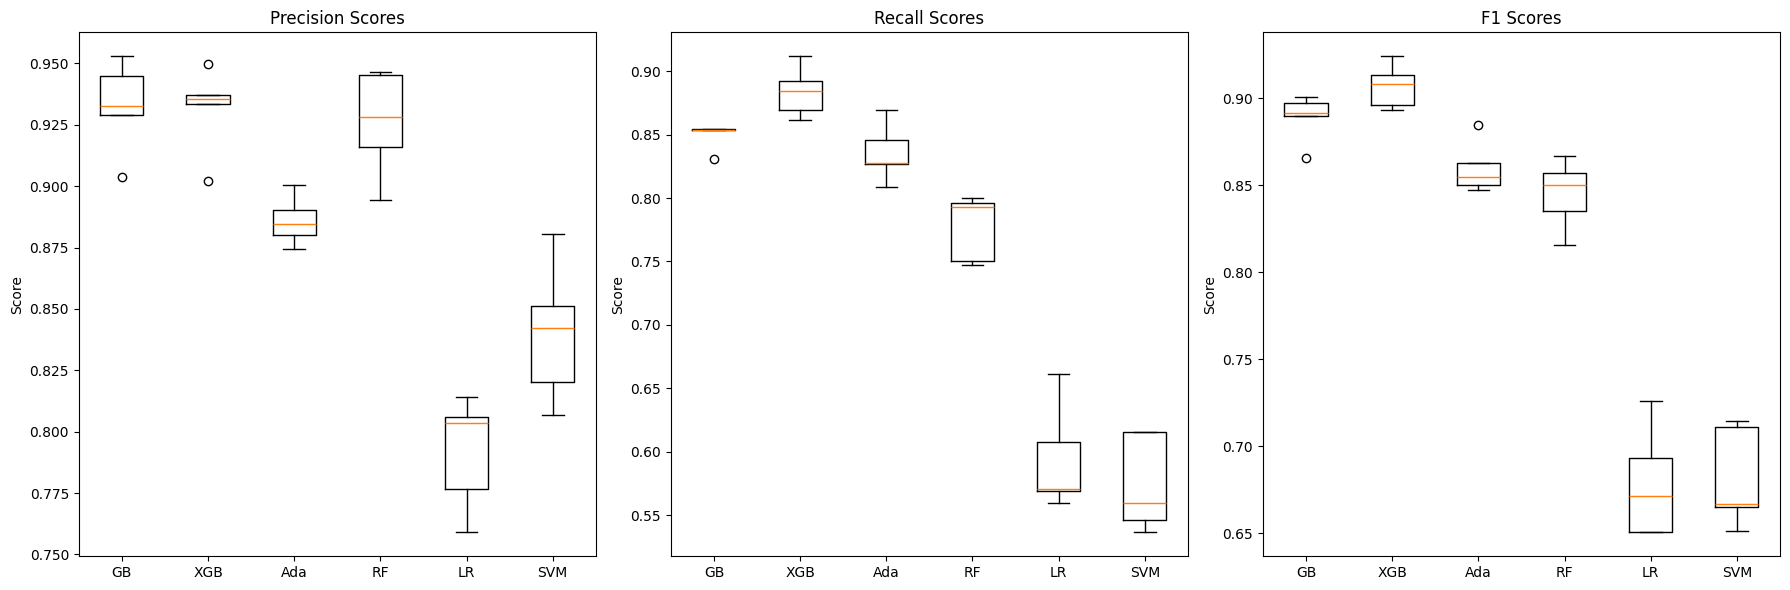

In [121]:
# Visualisation
evaluator.plot_results()

We can see that of the default models tested above, two stand out: XGBoost and GradientBoosting. We'll be optimising these two models next to see which one best adapts to the data.

In [62]:
# Feature importance
analyzer = FeatureImportanceAnalyzer(models, X_train_trans_df)
analyzer.analyze_feature_importance()

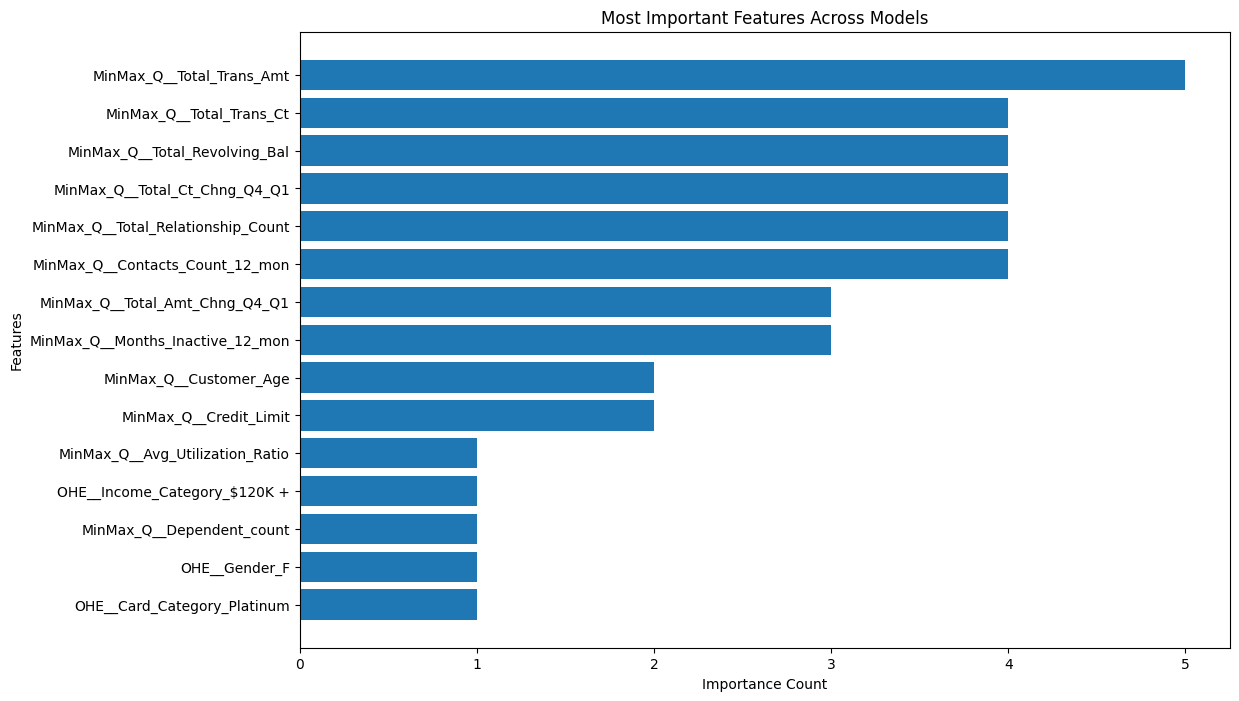

In [63]:
analyzer.plot_feature_importance()

## 3.2. Evaluation of pre-selected models

#### XGBoost :

[[1677   24]
 [  33  292]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1701
           1       0.92      0.90      0.91       325

    accuracy                           0.97      2026
   macro avg       0.95      0.94      0.95      2026
weighted avg       0.97      0.97      0.97      2026



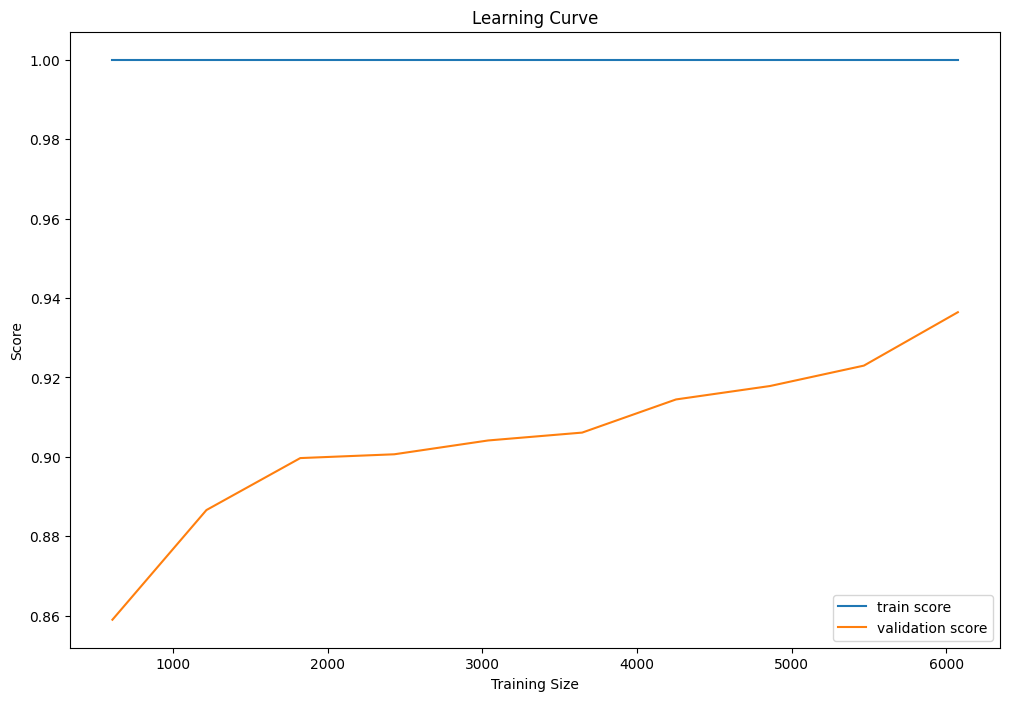

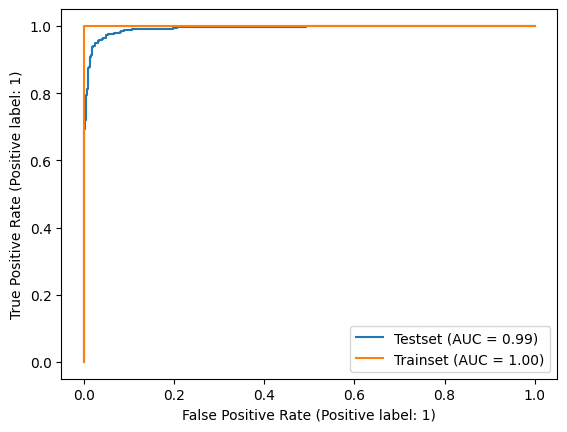

In [21]:
# Evaluation with default models 
chosen_model = xgb.XGBClassifier(random_state=42, n_jobs=-1) 
model_analyzer = ModelAnalyzer(chosen_model, X_train_trans, y_train, X_test_trans, y_test)
model_analyzer.evaluation()

According to the learning curve, our model training phase is overlearning (train score constant at 1). However, the validation curve increases progressively, indicating a potentially good performance. The model therefore needs to be optimised.

#### Gradient Boosting :

[[1679   22]
 [  49  276]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1701
           1       0.93      0.85      0.89       325

    accuracy                           0.96      2026
   macro avg       0.95      0.92      0.93      2026
weighted avg       0.96      0.96      0.96      2026



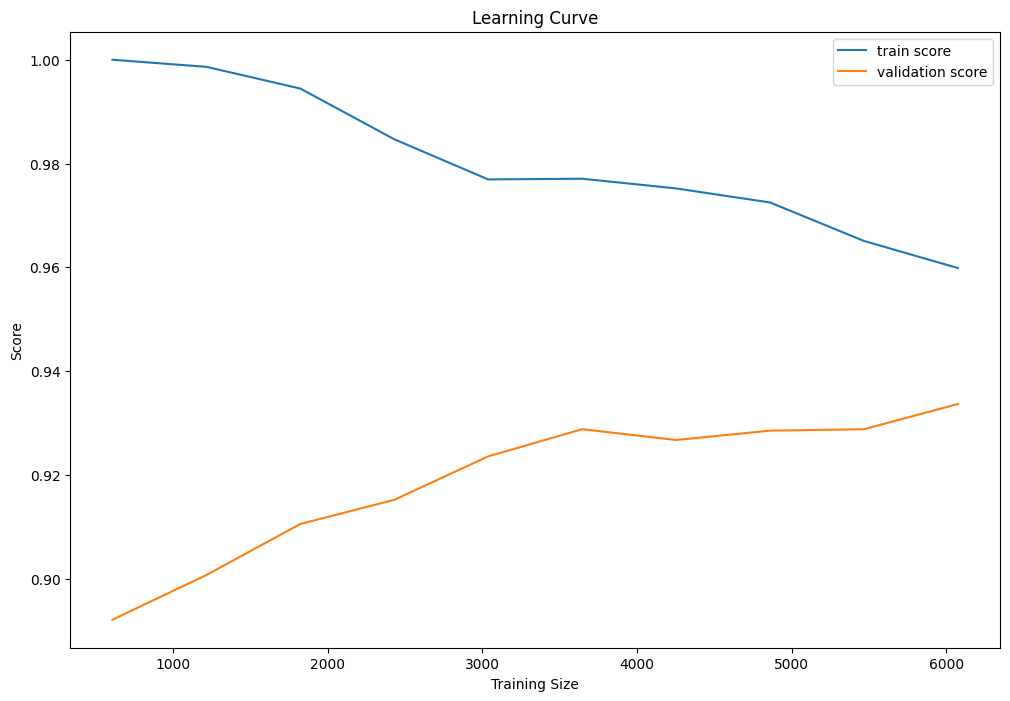

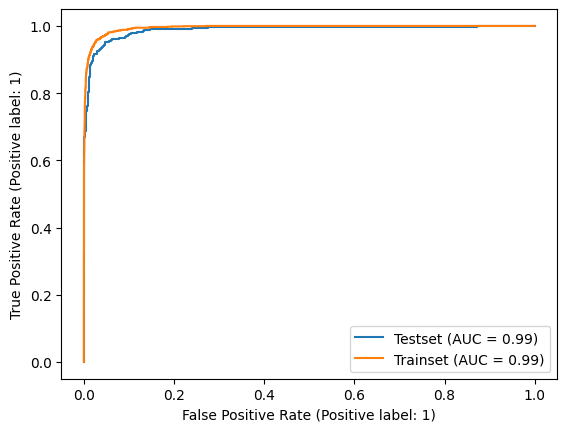

In [22]:
# Evaluation with default model
chosen_model2 = GradientBoostingClassifier(random_state=42) 
model_analyzer = ModelAnalyzer(chosen_model2, X_train_trans, y_train, X_test_trans, y_test)
model_analyzer.evaluation()

The learning curve indicates a robust training phase, with the two scores tending to converge. 

## 3.3. New model based on best features (Feature selection) 

In [14]:
# New models with selected feature
cols = ["MinMax_Q__Contacts_Count_12_mon",
        "MinMax_Q__Total_Relationship_Count",
        "MinMax_Q__Total_Amt_Chng_Q4_Q1",
        "MinMax_Q__Total_Ct_Chng_Q4_Q1",
        "MinMax_Q__Total_Revolving_Bal",
        "MinMax_Q__Total_Trans_Ct",
        "MinMax_Q__Total_Trans_Amt",
        "MinMax_Q__Months_Inactive_12_mon",
        "MinMax_Q__Customer_Age"]

X_train_trans = X_train_trans_df[cols]
X_test_trans = X_test_trans_df[cols]

X_train_trans.shape, X_test_trans.shape, y_train.shape, y_test.shape

((8101, 9), (2026, 9), (8101,), (2026,))

#### XGBoost :

[[1673   28]
 [  35  290]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1701
           1       0.91      0.89      0.90       325

    accuracy                           0.97      2026
   macro avg       0.95      0.94      0.94      2026
weighted avg       0.97      0.97      0.97      2026



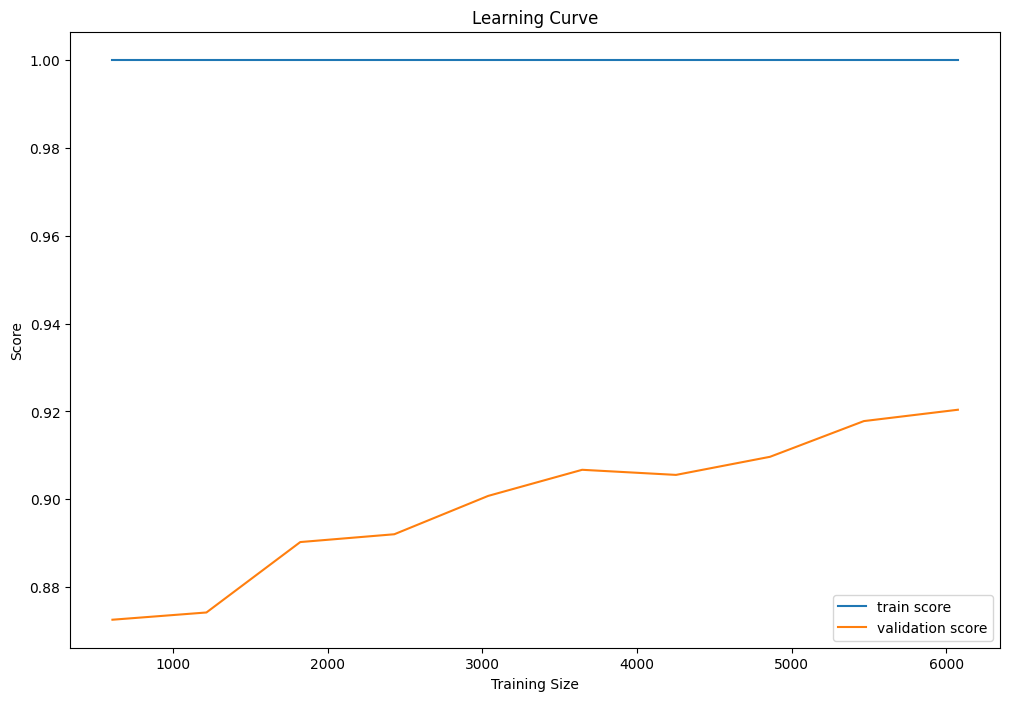

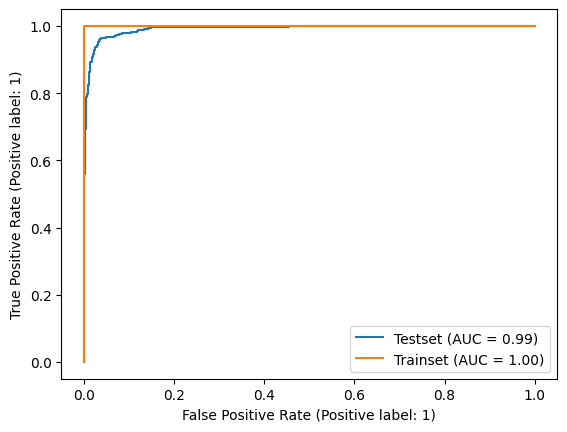

In [33]:
# Visualisation
xgb_default2 = xgb.XGBClassifier(n_jobs=-1, random_state=0)
model_analyzer = ModelAnalyzer(xgb_default2, X_train_trans, y_train, X_test_trans, y_test)

model_analyzer.evaluation()

With the XGBoost model still overlearning, we now need to move on to optimising the hyperparameters.

#### Gradient Boosting :

[[1678   23]
 [  49  276]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1701
           1       0.92      0.85      0.88       325

    accuracy                           0.96      2026
   macro avg       0.95      0.92      0.93      2026
weighted avg       0.96      0.96      0.96      2026



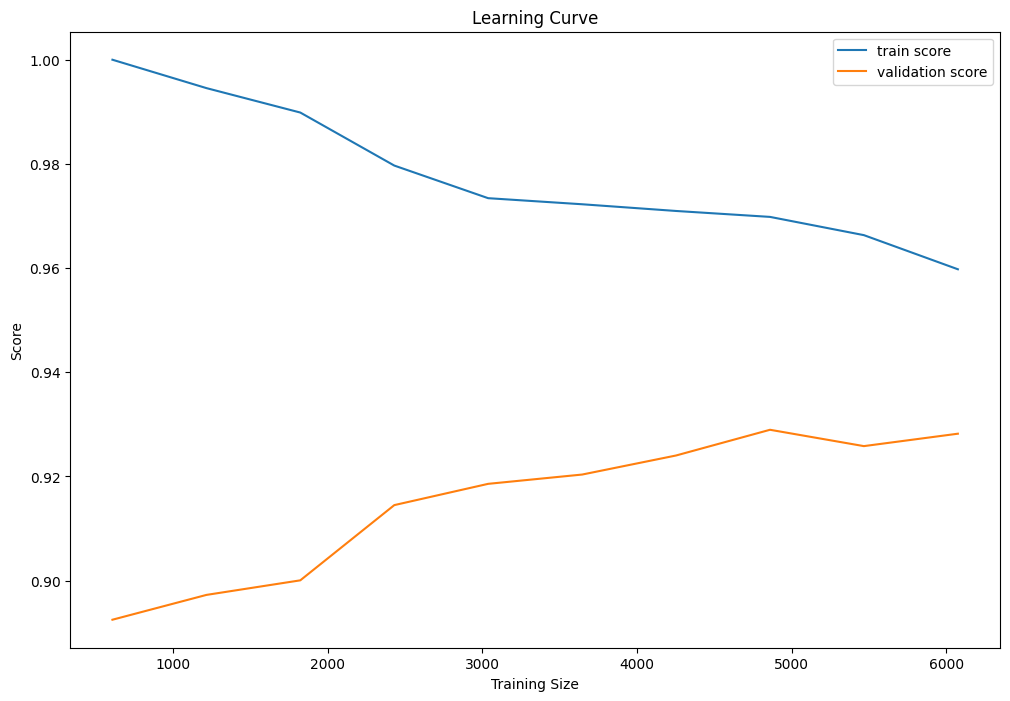

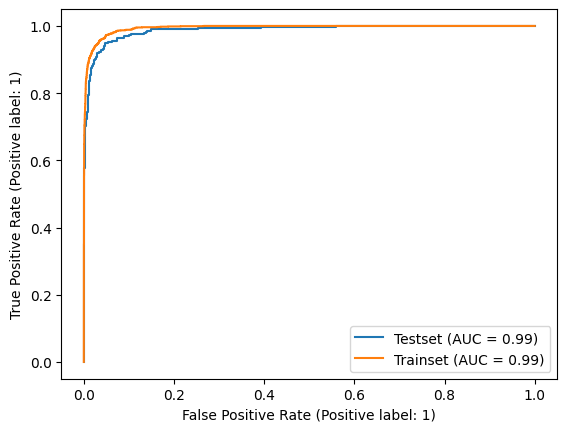

In [35]:
gb_default = GradientBoostingClassifier(random_state=42)
model_analyzer = ModelAnalyzer(gb_default, X_train_trans, y_train, X_test_trans, y_test)

model_analyzer.evaluation()

Almost identical performance, which shows that the other variables make no contribution to the model. We're going to keep these variables to save calculation time.

# 4. Optimisation 
[Up](#table-of-contents)

## 4.1. GradientBoosting optimisation: 

In [ ]:
def objective(trial):
    param = {
        'loss': trial.suggest_categorical('loss', ['log_loss', 'exponential']),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'max_depth': trial.suggest_int('max_depth', 1, 3),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'min_weight_fraction_leaf': trial.suggest_float('min_weight_fraction_leaf', 0.0, 0.5),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'random_state': 0
    }

    model = GradientBoostingClassifier(**param)

    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    f1 = cross_val_score(model, X_train_trans, y_train, cv=skf, scoring=make_scorer(f1_score)).mean()

    return f1

In [ ]:
sampler = TPESampler(seed = 0) # Bayésien
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=100)

[I 2024-07-18 09:27:41,174] A new study created in memory with name: no-name-4e2e6704-9a10-4cdc-a5b5-2ca115c31e43
[I 2024-07-18 09:27:45,240] Trial 0 finished with value: 0.47219678369161056 and parameters: {'loss': 'exponential', 'learning_rate': 0.18480137906077673, 'n_estimators': 186, 'subsample': 0.7118273996694524, 'max_depth': 2, 'min_samples_split': 10, 'min_samples_leaf': 9, 'min_weight_fraction_leaf': 0.48183138025051464, 'max_features': 'log2'}. Best is trial 0 with value: 0.47219678369161056.
[I 2024-07-18 09:27:46,671] Trial 1 finished with value: 0.5535783135691981 and parameters: {'loss': 'exponential', 'learning_rate': 0.2784230251048717, 'n_estimators': 67, 'subsample': 0.5435646498507704, 'max_depth': 1, 'min_samples_split': 17, 'min_samples_leaf': 8, 'min_weight_fraction_leaf': 0.4350060741234096, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.5535783135691981.
[I 2024-07-18 09:27:53,336] Trial 2 finished with value: 0.8043038182519469 and parameters: {'loss'

In [ ]:
print('Best trial:')
trial_2 = study.best_trial
print('precision: {}'.format(trial_2.value))
print("Best hyperparameters: {}".format(trial_2.params))

Best trial:
precision: 0.9081884850675825
Best hyperparameters: {'loss': 'log_loss', 'learning_rate': 0.11172350498446691, 'n_estimators': 291, 'subsample': 0.6436757617324871, 'max_depth': 3, 'min_samples_split': 9, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 9.346034371258841e-05, 'max_features': 'sqrt'}


In [ ]:
optuna.visualization.plot_param_importances(study)

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
best_params = trial_2.params 
gb_opt = GradientBoostingClassifier(**best_params)

[[1678   23]
 [  34  291]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1701
           1       0.93      0.90      0.91       325

    accuracy                           0.97      2026
   macro avg       0.95      0.94      0.95      2026
weighted avg       0.97      0.97      0.97      2026



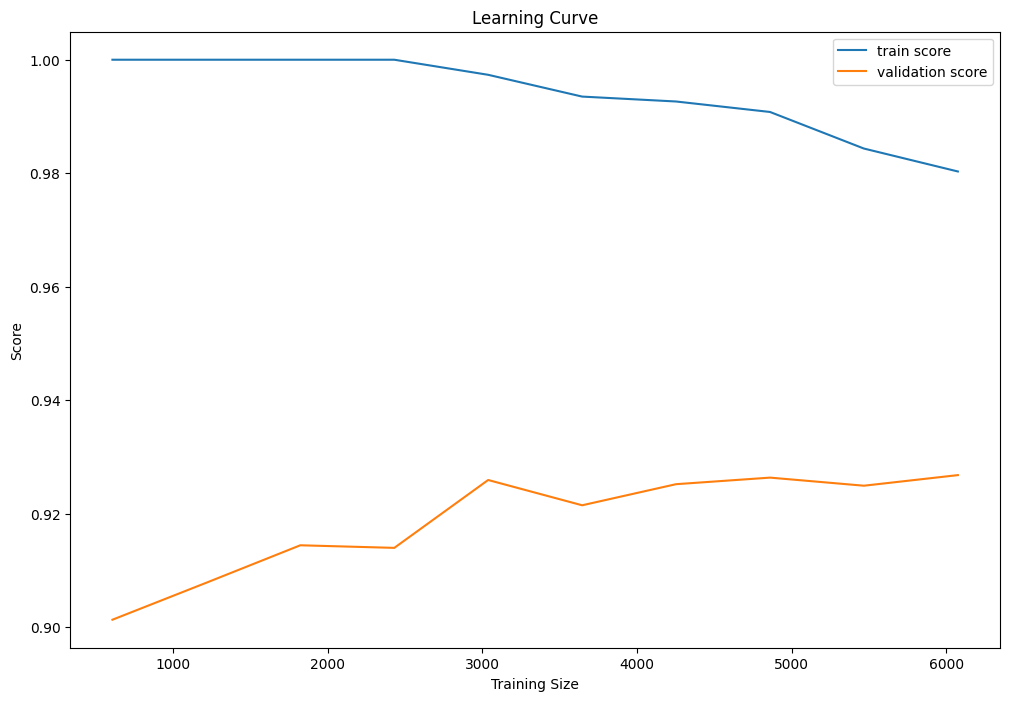

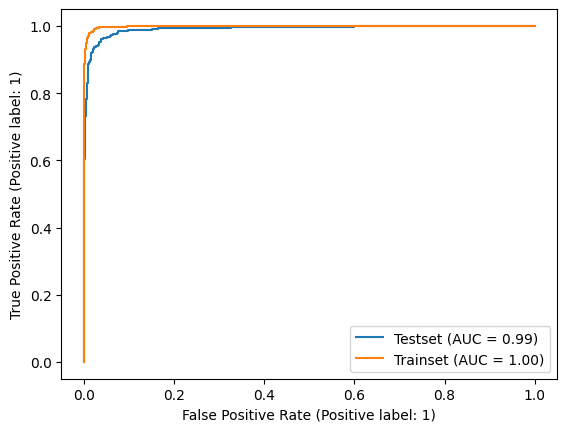

In [ ]:
model_analyzer = ModelAnalyzer(gb_opt, X_train_trans, y_train, X_test_trans, y_test)
model_analyzer.evaluation()

Optimisation of the hyperparameters did not result in very robust learning, and the difference between the curves is significant.

In [ ]:
model_analyzer.calculate_top_predictions()

Parmi les 20% de meilleures probabilités, 77.53% de clients sont réellement souscripteurs


y_probs  true
8379  0.999976     1
9898  0.999953     1
9602  0.999921     1
7133  0.999894     1
7953  0.999866     1
...        ...   ...
3934  0.125171     0
8980  0.123884     0
2288  0.122594     0
994   0.121473     0
2160  0.120105     0

[405 rows x 2 columns]

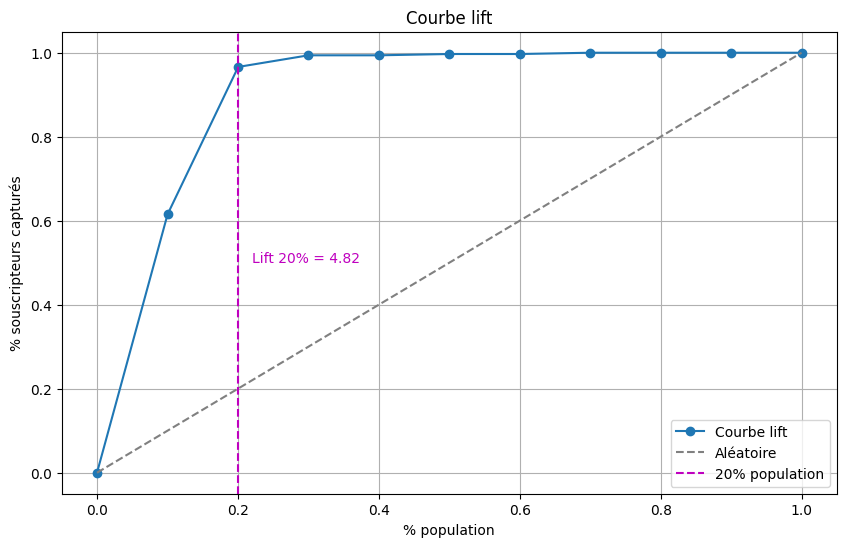

segment  sum_y_true  count  cum_sub   cum_pop  perc_sub_capt_relatif  \
0        -1           0      0        0  0.000000                    NaN   
1         0         200    203      200  0.100197               0.985222   
2         1         114    203      314  0.200395               0.773399   
3         2           9    202      323  0.300099               0.531250   
4         3           0    203      323  0.400296               0.398274   
5         4           1    202      324  0.500000               0.319842   
6         5           0    203      324  0.600197               0.266447   
7         6           1    202      325  0.699901               0.229196   
8         7           0    203      325  0.800099               0.200494   
9         8           0    202      325  0.899803               0.178278   
10        9           0    203      325  1.000000               0.160415   

    perc_sub_capt  
0        0.000000  
1        0.615385  
2        0.966154  
3        0.993846  
4        0.993846  
5        0.996923  
6        0.996923  
7        1.000000  
8        1.000000  
9        1.000000  
10       1.000000

In [ ]:
model_analyzer.create_lift_table()

## 4.2. XGBoost optimisation

In [295]:
# Hyperparameters optimisation with Optuna

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import optuna
from optuna.samplers import TPESampler

train_x, val_x, train_y, val_y = train_test_split(X_train_trans, y_train, train_size=0.7, random_state=1)

def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'booster': 'gbtree',
        'max_depth': trial.suggest_int('max_depth', 1, 3),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True),
        'seed': 42
    }

    model = xgb.XGBClassifier(**param)

    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    fit_params = {
        'verbose': False,
        'eval_set': [(val_x, val_y)],
        'early_stopping_rounds': 10  
    }
    f1 = cross_val_score(model, X_train_trans, y_train, cv=skf, scoring=make_scorer(f1_score), fit_params=fit_params).mean()

    return f1


In [296]:
sampler = TPESampler(seed = 0) # Bayésien
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=200)

[I 2024-07-17 20:46:07,327] A new study created in memory with name: no-name-b97ccc3c-11cc-4211-9be1-3ffcba0dfb2f
[I 2024-07-17 20:46:09,095] Trial 0 finished with value: 0.8992992962361337 and parameters: {'max_depth': 2, 'learning_rate': 0.21740491624800165, 'n_estimators': 201, 'subsample': 0.7724415914984484, 'colsample_bytree': 0.7118273996694524, 'min_child_weight': 7, 'reg_alpha': 3.167361913032263e-05, 'reg_lambda': 0.13620216352659412}. Best is trial 0 with value: 0.8992992962361337.
[I 2024-07-17 20:46:11,905] Trial 1 finished with value: 0.8962820112227637 and parameters: {'max_depth': 3, 'learning_rate': 0.12119804045947552, 'n_estimators': 248, 'subsample': 0.7644474598764522, 'colsample_bytree': 0.7840222805469661, 'min_child_weight': 10, 'reg_alpha': 3.70073907377613e-08, 'reg_lambda': 4.9777650902423137e-08}. Best is trial 0 with value: 0.8992992962361337.
[I 2024-07-17 20:46:13,629] Trial 2 finished with value: 0.8660055768285269 and parameters: {'max_depth': 1, 'learn

In [297]:
print('Best trial:')
trial = study.best_trial
print('precision: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Best trial:
precision: 0.9142847935943259
Best hyperparameters: {'max_depth': 3, 'learning_rate': 0.10784525613941554, 'n_estimators': 274, 'subsample': 0.8766609655185922, 'colsample_bytree': 0.5559101287300079, 'min_child_weight': 2, 'reg_alpha': 1.148922089078765e-05, 'reg_lambda': 0.0002080925720941604}


In [298]:
best_params = trial.params 
xgb_opt = xgb.XGBClassifier(**best_params)

[[1676   25]
 [  30  295]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1701
           1       0.92      0.91      0.91       325

    accuracy                           0.97      2026
   macro avg       0.95      0.95      0.95      2026
weighted avg       0.97      0.97      0.97      2026



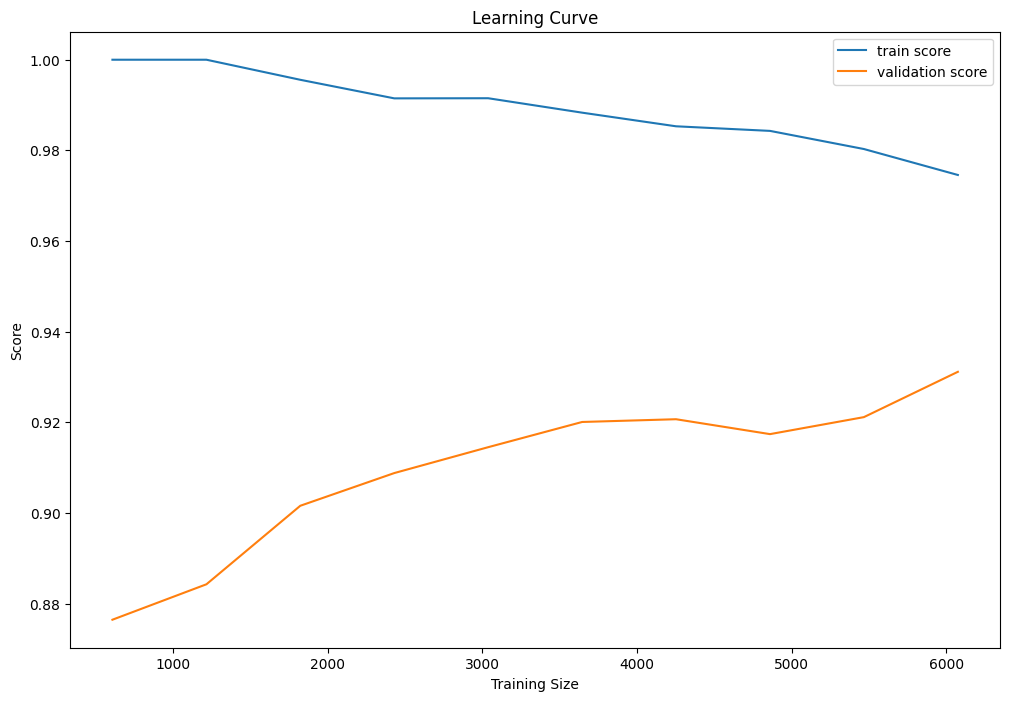

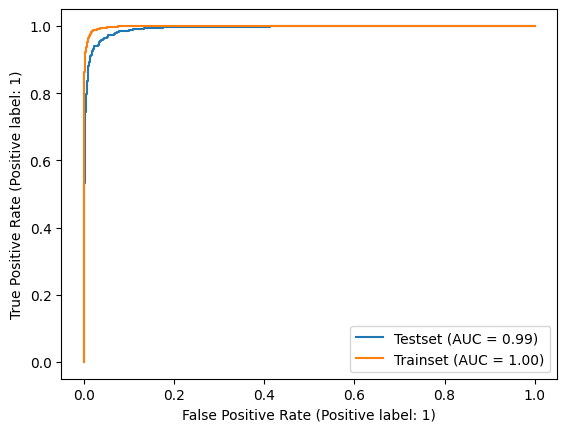

In [52]:
# Modeling of the new model with optimised hyperparameters
model_analyzer = ModelAnalyzer(xgb_opt, X_train_trans, y_train, X_test_trans, y_test)
model_analyzer.evaluation()

In [21]:
# Top 20 best predictions
model_analyzer.calculate_top_predictions()

Parmi les 20% de meilleures probabilités, 77.53% de clients sont réellement souscripteurs


y_probs  true
9602  0.999964     1
8379  0.999925     1
9898  0.999900     1
7133  0.999858     1
8558  0.999852     1
...        ...   ...
3934  0.174008     0
9717  0.171442     1
2601  0.171364     0
8878  0.171340     0
409   0.170275     0

[405 rows x 2 columns]

Good accuracy on the top 20% of prediction probabilities.

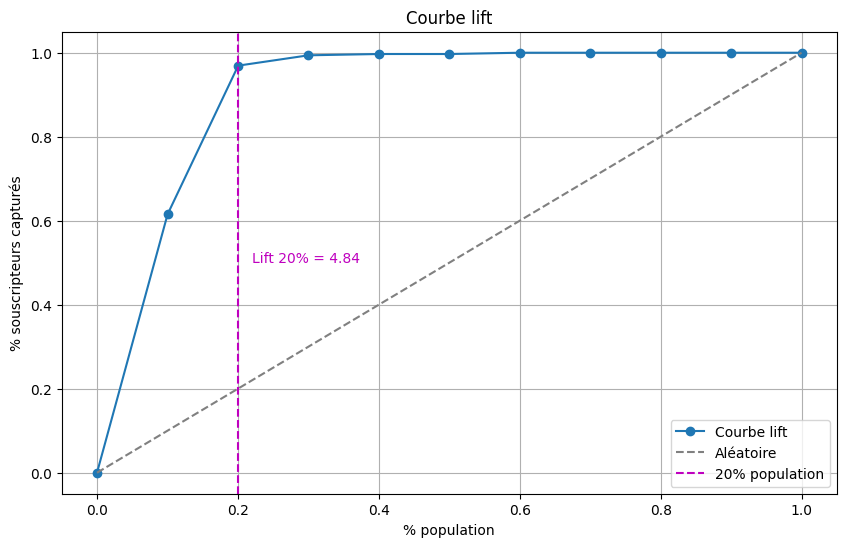

segment  sum_y_true  count  cum_sub   cum_pop  perc_sub_capt_relatif  \
0        -1           0      0        0  0.000000                    NaN   
1         0         200    203      200  0.100197               0.985222   
2         1         115    203      315  0.200395               0.775862   
3         2           8    202      323  0.300099               0.531250   
4         3           1    203      324  0.400296               0.399507   
5         4           0    202      324  0.500000               0.319842   
6         5           1    203      325  0.600197               0.267270   
7         6           0    202      325  0.699901               0.229196   
8         7           0    203      325  0.800099               0.200494   
9         8           0    202      325  0.899803               0.178278   
10        9           0    203      325  1.000000               0.160415   

    perc_sub_capt  
0        0.000000  
1        0.615385  
2        0.969231  
3        0.993846  
4        0.996923  
5        0.996923  
6        1.000000  
7        1.000000  
8        1.000000  
9        1.000000  
10       1.000000

In [17]:
# Lift creation
model_analyzer.create_lift_table()

The lift curve shows that in the top 20% of prediction probabilities, the model captures almost 97% of all customers whose target is equal to 1. In fact, the lift is 4.84 (20 * 4.84 ~ 96,8)

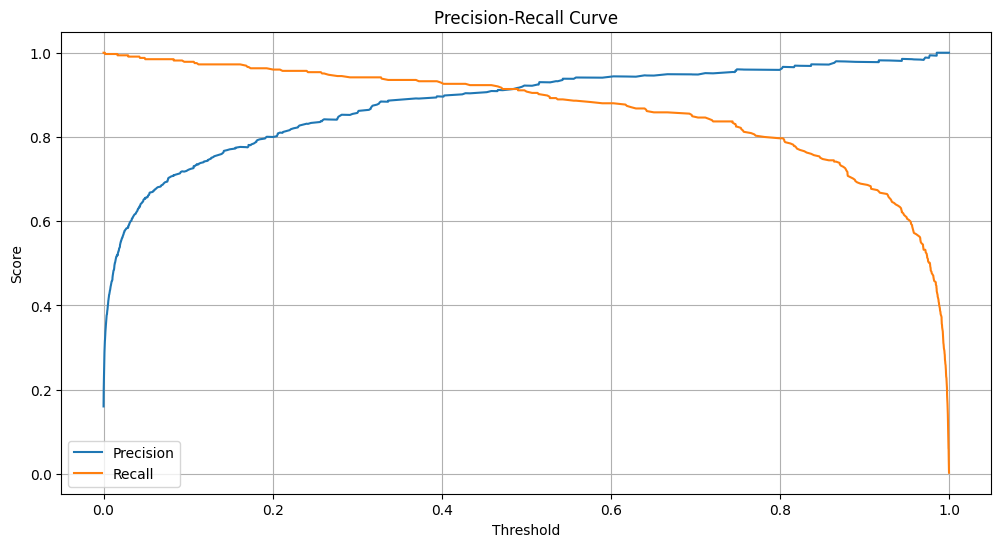

Best Threshold: 0.50, Best F1 Score: 0.92
F1 Score final: 0.9147286821705427


In [18]:
model_analyzer.plot_precision_recall_curve()

The precision-recall curve allows us to visualise how precision changes with recall as the threshold varies. In this case, the threshold for an optimal F1 score is 0.5, which is the default threshold. Therefore, no adjustments are needed for new predictions.

In [19]:
y_pred_xgb = model_analyzer.get_new_y_pred()

In [244]:
# Saving the model
from joblib import dump, load

dump(xgb_opt, 'XGB_F191.pkl')

['XGB_F191.pkl']

# 5. Analysis of misclassification errors 
[Up](#table-of-contents)

In [24]:
dftest = pd.DataFrame({'y_pred' : y_pred_xgb, 'true': y_test})

In [97]:
# We use XGBoost predictions
df_recup = pd.DataFrame({'y_pred' : y_pred_xgb, 'true': y_test})

In [98]:
# Prediction set with customer details
liste_clients = pd.concat([X_test.reset_index(drop=True), df_recup.reset_index(drop=True)], axis=1).sort_values(by='y_pred', ascending=False)

# Well-predicted customers
well_pred = liste_clients[(liste_clients["y_pred"] == True) & (liste_clients["true"] == 1)] 

# Attrited customers from testset
testset_attr = testset[testset["Attrition_Flag"] == "Attrited Customer"]

# False negatives
FN = liste_clients[(liste_clients["y_pred"] == False) & (liste_clients["true"] == 1)] 

# False positives
FP = liste_clients[(liste_clients["y_pred"] == True) & (liste_clients["true"] == 0)] 

In [99]:
columns = ['Contacts_Count_12_mon', 'Total_Relationship_Count',
       'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal',
       'Total_Trans_Ct', 'Total_Trans_Amt', 'Months_Inactive_12_mon',
       'Customer_Age']

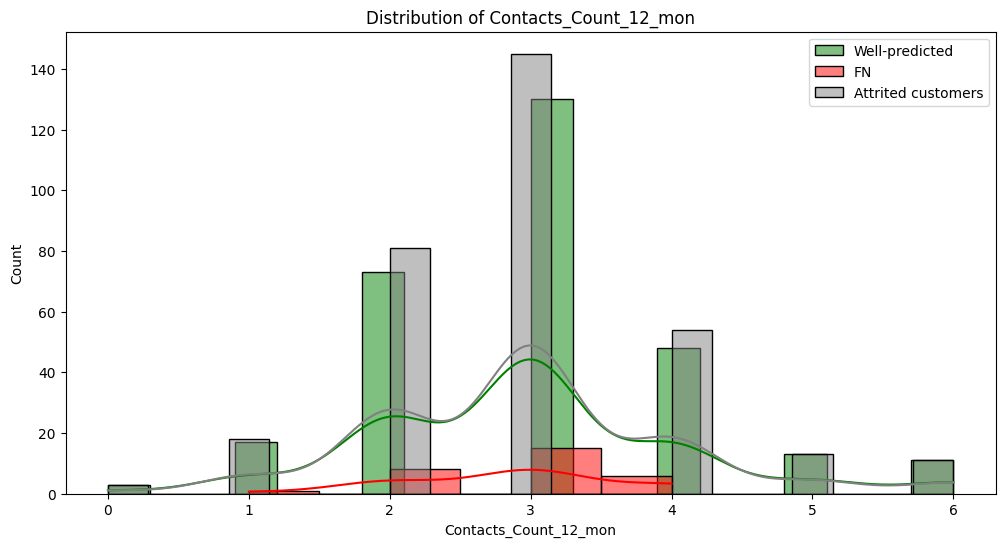

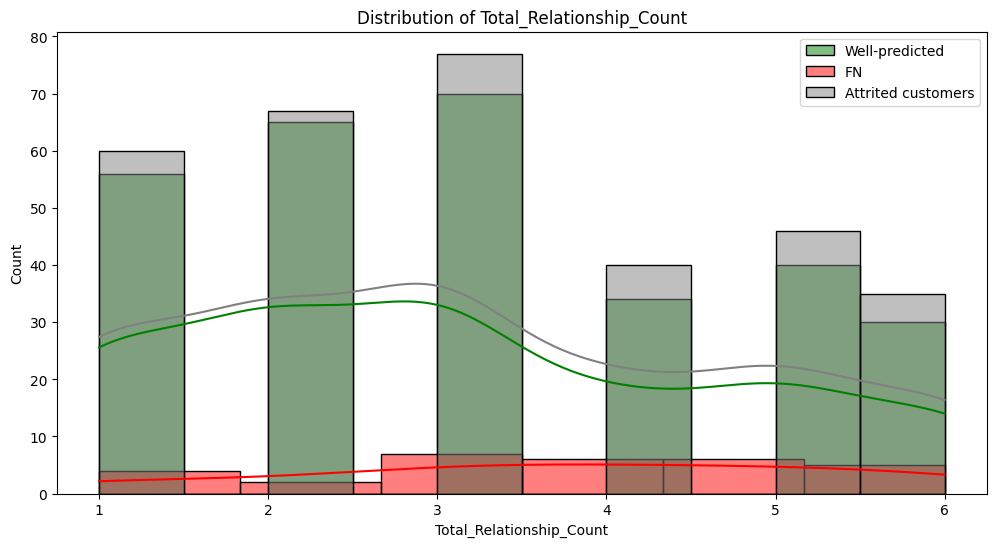

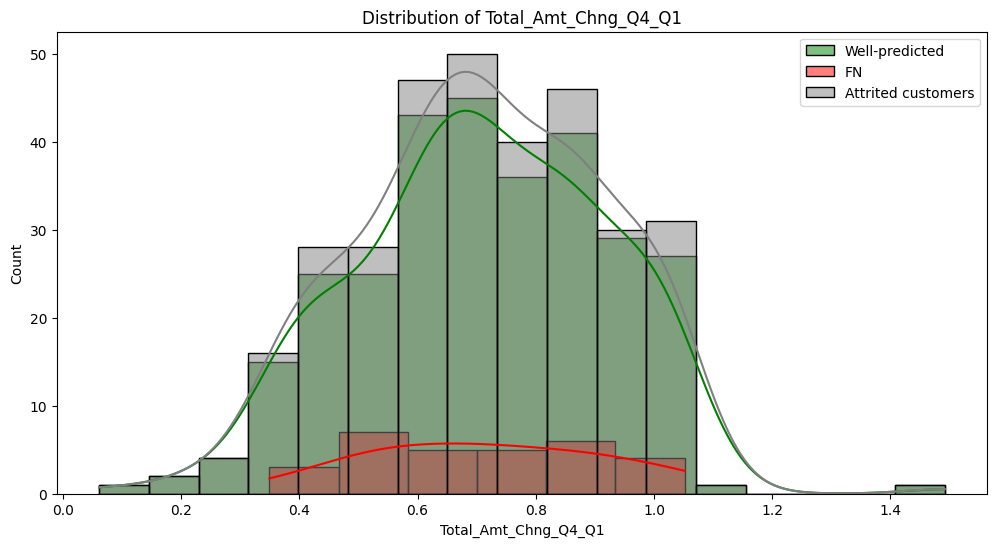

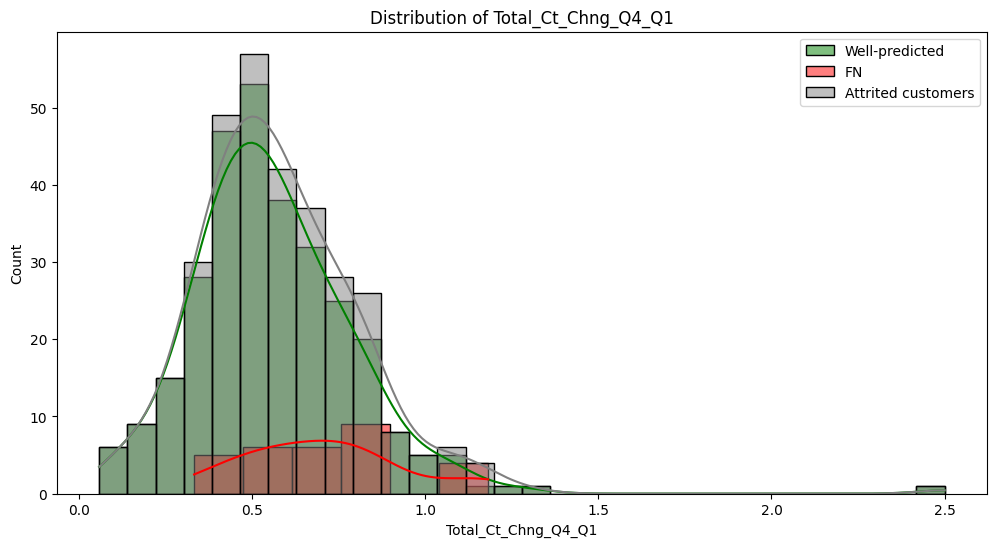

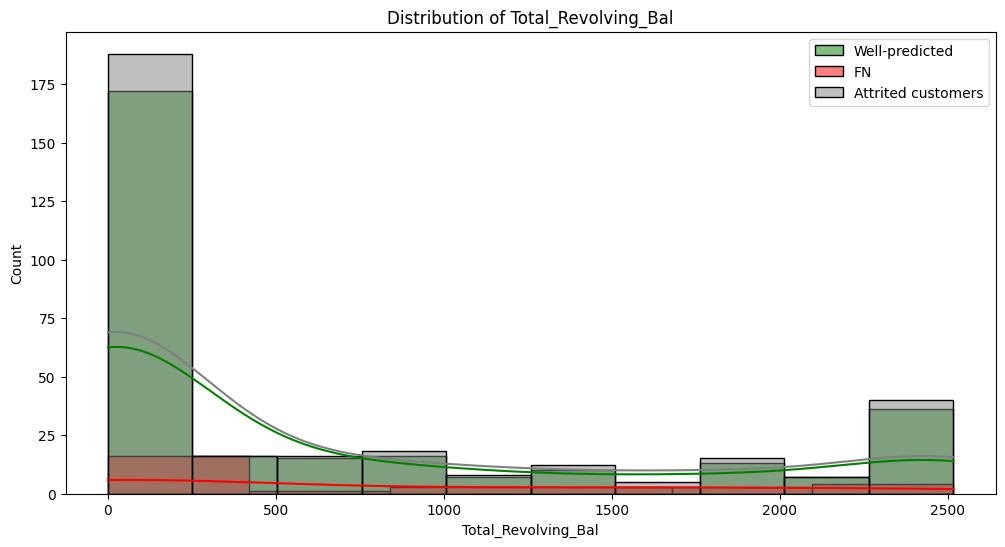

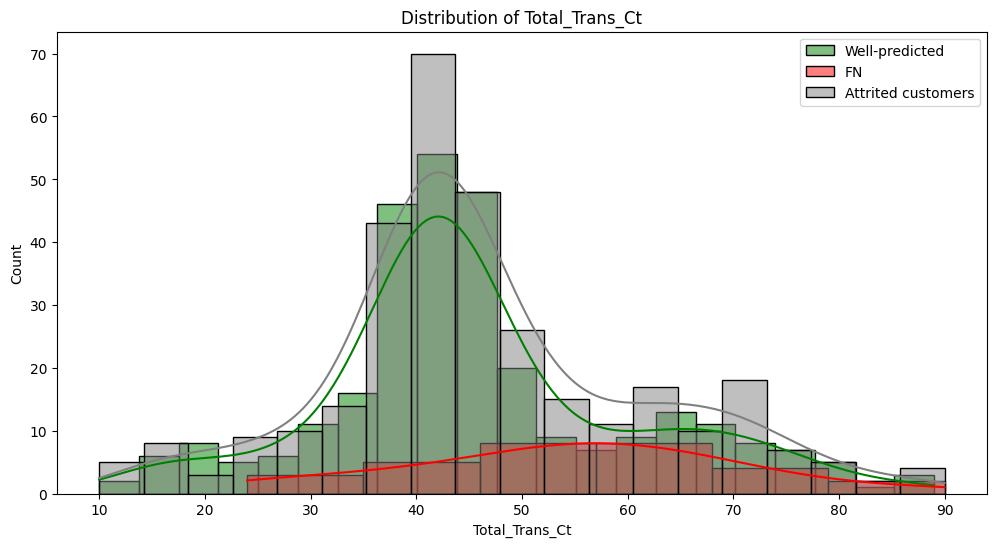

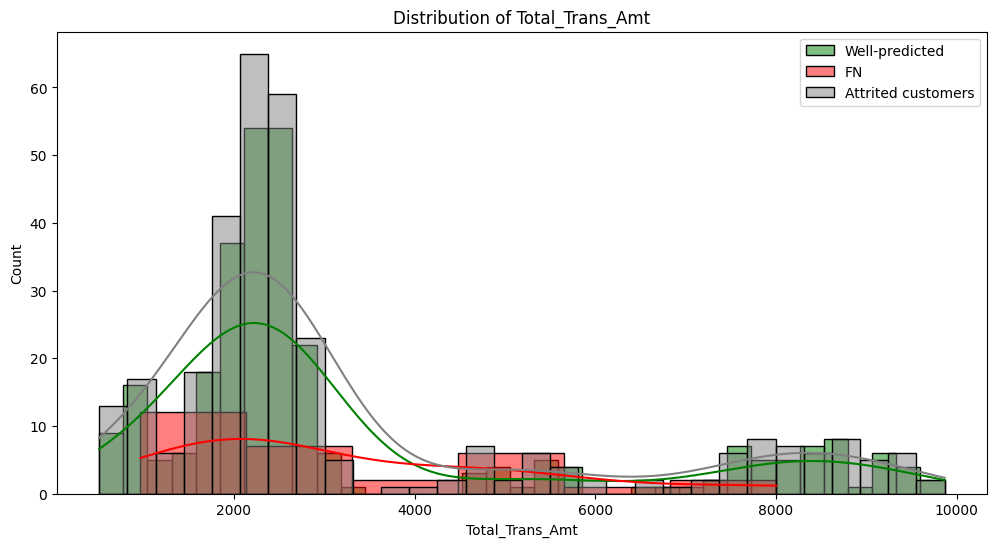

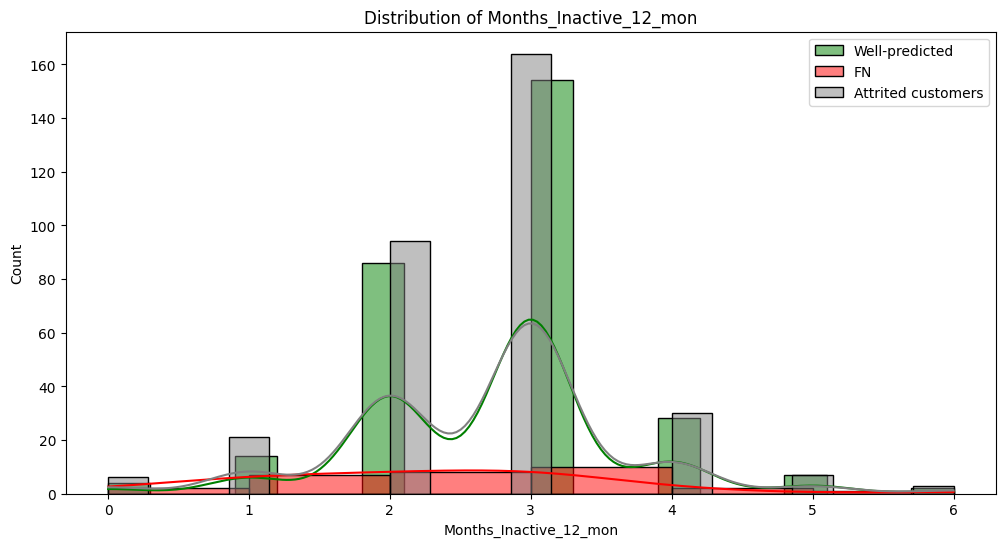

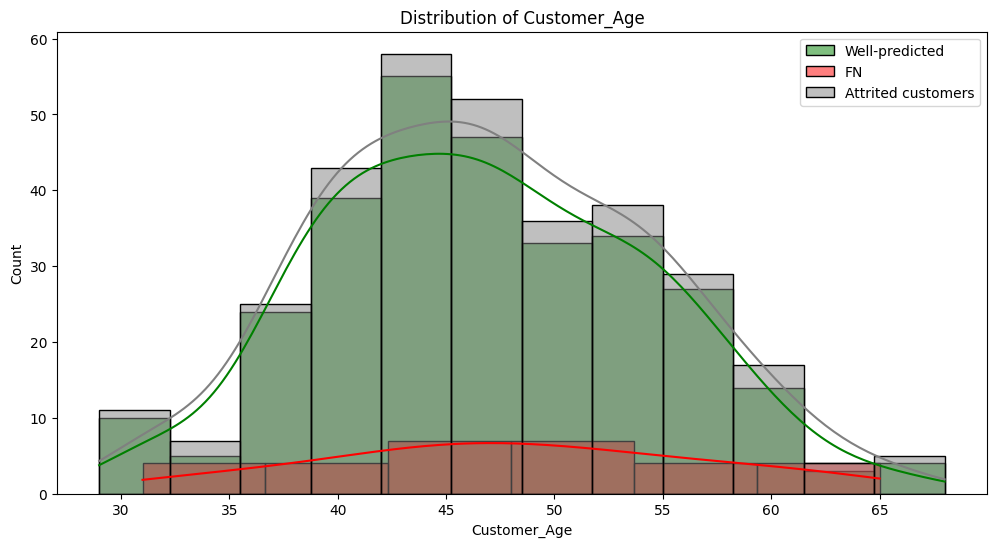

In [100]:
# Comparison of good predictions vs FN vs Attrited customers

for col in columns:
    plt.figure(figsize=(12, 6))
    
    sns.histplot(well_pred[col], color='green', label='Well-predicted',  kde=True)
    sns.histplot(FN[col], color='red', label='FN', kde=True)
    sns.histplot(testset_attr[col], color='grey', label='Attrited customers',  kde=True)
    
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.show()

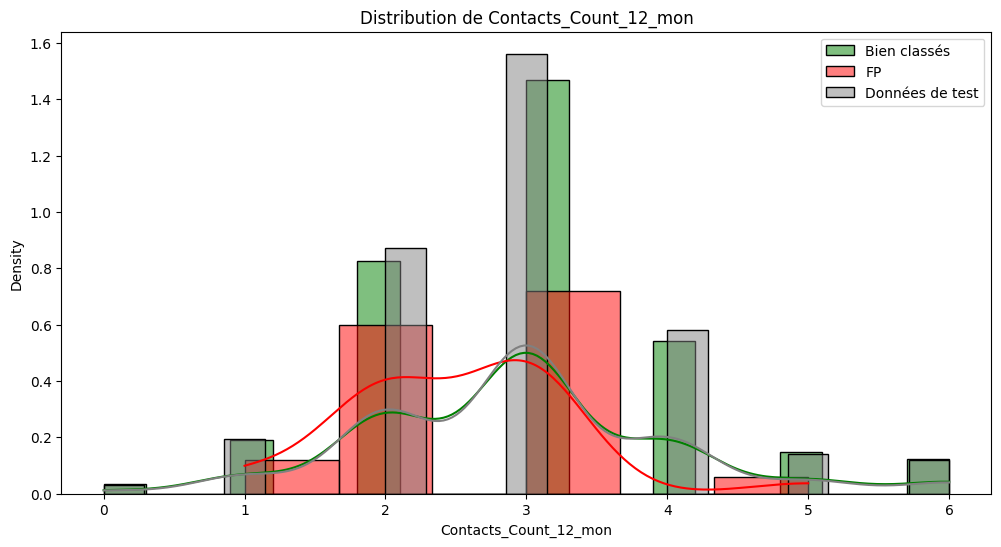

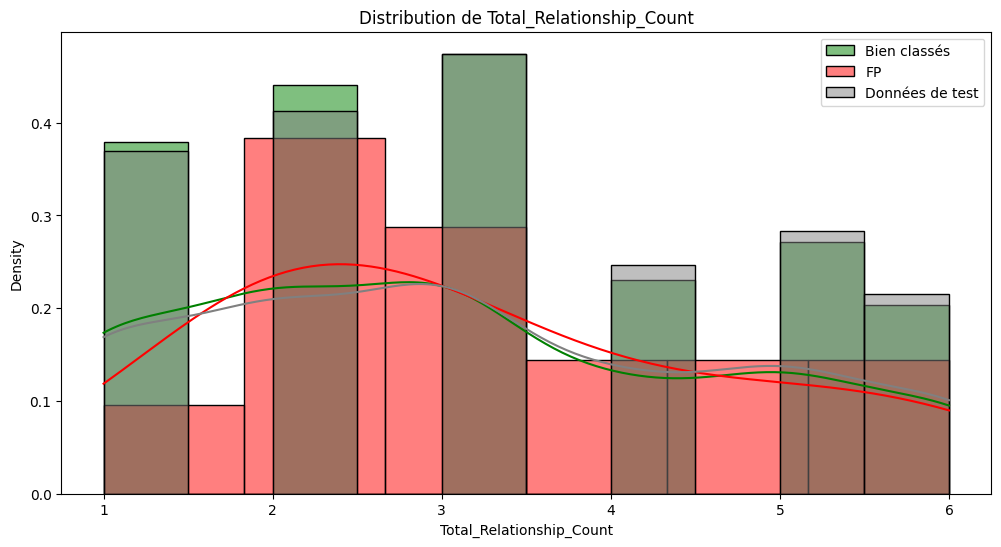

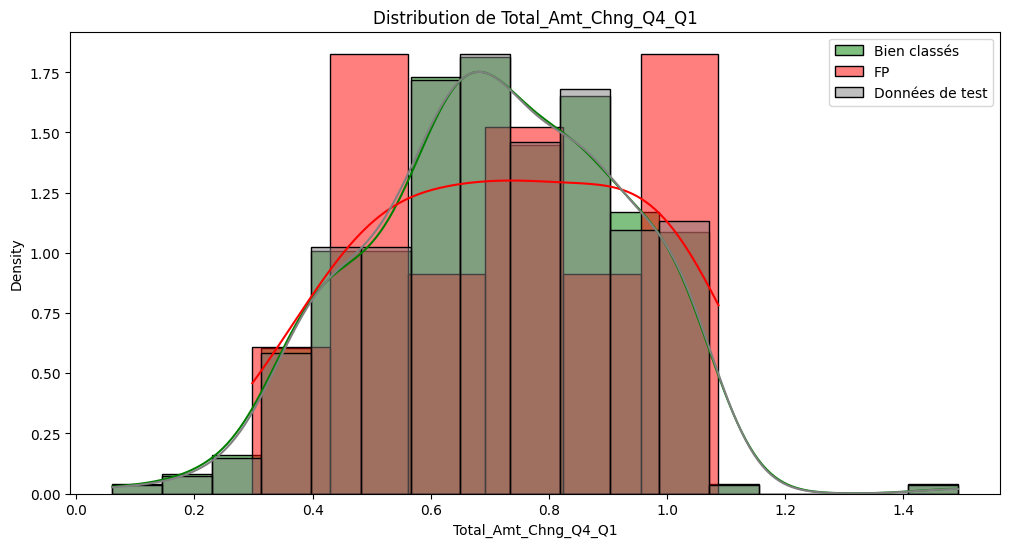

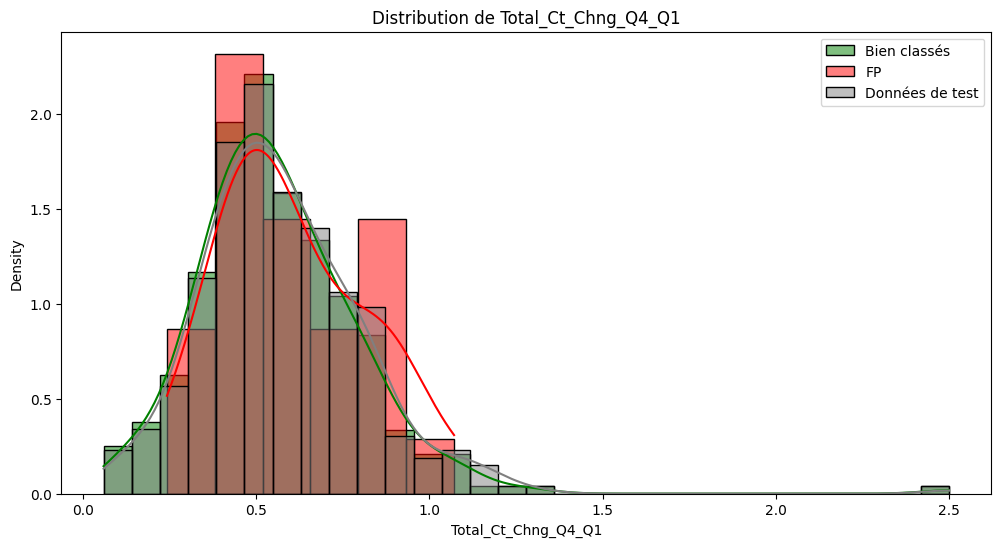

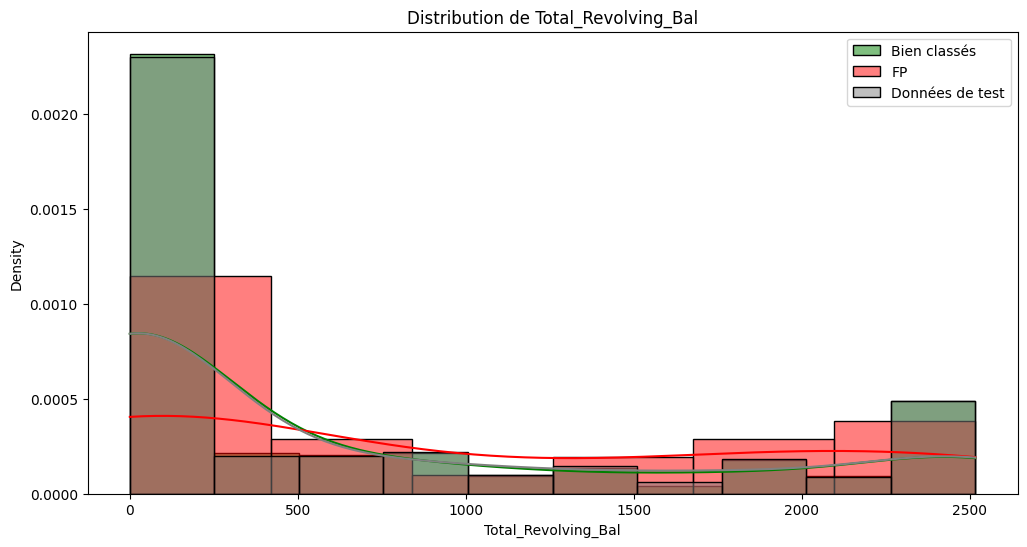

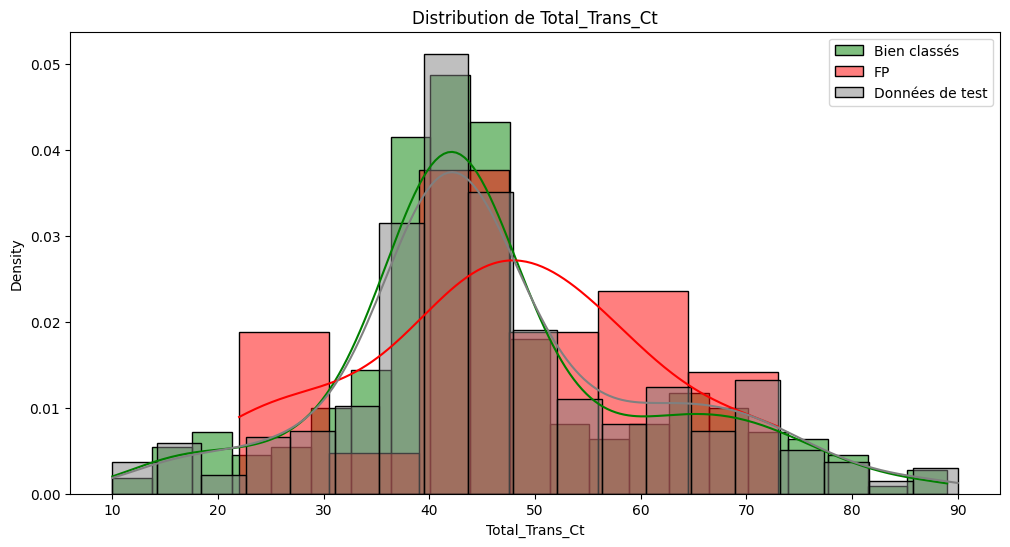

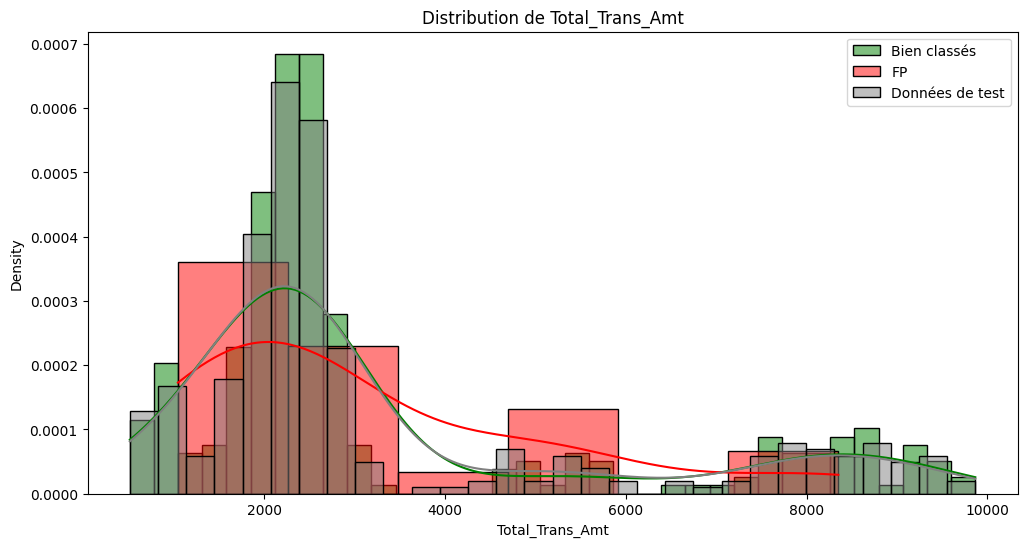

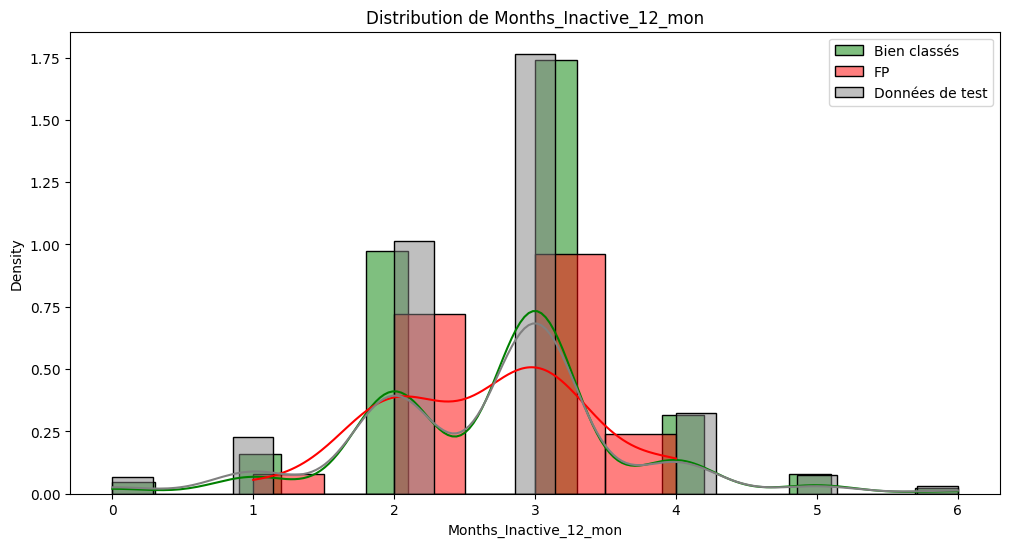

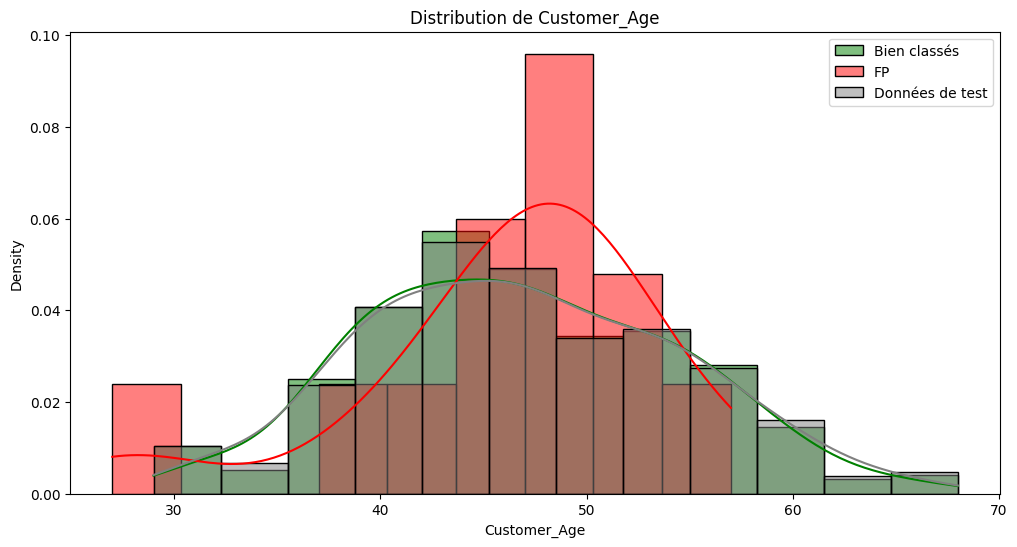

In [87]:
# Comparison of good predictions vs FP vs Attrited customers

for col in columns:
    plt.figure(figsize=(12, 6))
    
    sns.histplot(well_pred[col], color='green', label='Well-predicted', stat="density", kde=True)
    sns.histplot(FP[col], color='red', label='FP', stat="density", kde=True)
    sns.histplot(testset_attr[col], color='grey', label='Attrited customers', stat="density", kde=True)
    
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.show()

The model seems to have some difficulty predicting when customers have large values for `Total_Trans_Ct` and smaller values for the number of relationships with their bank.

# Predicted clients

In [103]:
print("Number of customers predicted to be attrited :",len([x for x in y_pred_xgb if x == 1]))
print("Number of customer in testset :", len(y_test))

Number of customers predicted to be attrited : 320
Number of customer in testset : 2026


In [102]:
testset[y_pred_xgb==True] 

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
8236  712790358  Attrited Customer            39      F                3   
1465  771544533  Attrited Customer            42      F                5   
7080  714789033  Attrited Customer            54      F                1   
7953  713748708  Attrited Customer            46      F                3   
5889  714031083  Attrited Customer            46      F                3   
...         ...                ...           ...    ...              ...   
2511  806256333  Attrited Customer            41      M                4   
7966  717409533  Attrited Customer            36      F                2   
206   719808558  Attrited Customer            55      F                2   
604   720605808  Attrited Customer            53      F                1   
6826  708793008  Attrited Customer            46      M                3   

     Education_Level Marital_Status Income_Category Card_Category  \
8236      Uneducated        Married         Unknown          Blue   
1465     High School        Married         Unknown          Blue   
7080        Graduate        Married  Less than $40K          Blue   
7953        Graduate         Single  Less than $40K          Blue   
5889        Graduate        Unknown         Unknown          Blue   
...              ...            ...             ...           ...   
2511        Graduate        Unknown     $60K - $80K          Blue   
7966   Post-Graduate         Single  Less than $40K          Blue   
206         Graduate        Married  Less than $40K          Blue   
604         Graduate         Single  Less than $40K          Blue   
6826       Doctorate       Divorced    $80K - $120K          Blue   

      Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
8236              30  ...                       3                      4   
1465              30  ...                       1                      4   
7080              50  ...                       3                      3   
7953              37  ...                       2                      4   
5889              30  ...                       2                      1   
...              ...  ...                     ...                    ...   
2511              36  ...                       3                      5   
7966              26  ...                       2                      3   
206               43  ...                       4                      3   
604               36  ...                       2                      3   
6826              35  ...                       3                      3   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
8236        3023.0                 1348           1675.0   
1465        3578.0                    0           3578.0   
7080        3173.0                 2517            656.0   
7953        1438.3                    0           1438.3   
5889        8869.0                    0           8869.0   
...            ...                  ...              ...   
2511        1438.3                  312           1126.3   
7966        1821.0                 1486            335.0   
206         1438.3                    0           1438.3   
604         1438.3                    0           1438.3   
6826        9949.0                    0           9949.0   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
8236                 0.358             2219              44   
1465                 0.759             1015              36   
7080                 0.619             2763              51   
7953                 0.350             1757              44   
5889                 0.413             1935              40   
...                    ...              ...             ...   
2511                 0.657             1786              26   
7966                 0.827             2824              43   
206                  0.707              886              27   


Thus, we obtain a list of clients predicted to potentially leave the bank.

# 6. Conclusion 
[Up](#table-of-contents)

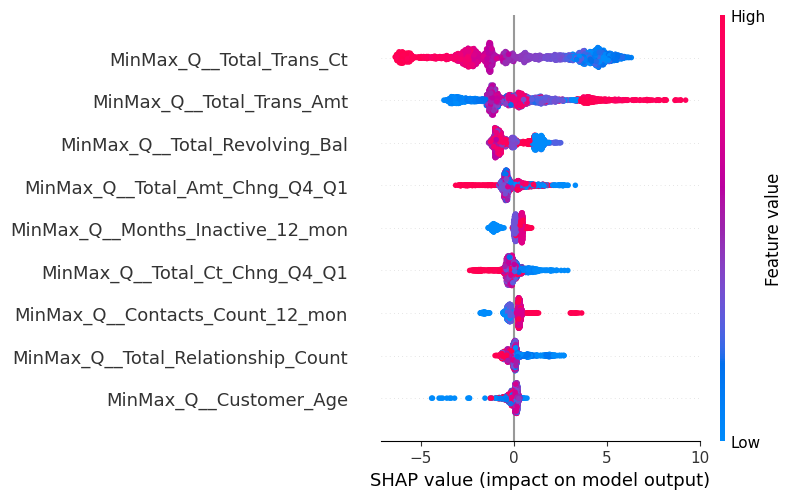

In [25]:
import shap

# SHAP values
explainer = shap.Explainer(xgb_opt, X_train_trans)
shap_values = explainer(X_test_trans)

shap.initjs()
shap.summary_plot(shap_values, X_test_trans)

We can interpret the above graph with the transformed variables since the MinMaxScaler scales the values to be between 0 and 1. Thus, a high value within this range corresponds to a large number on the original scale.

- Negative SHAP values for high values of Total_Trans_Ct (total number of transactions) indicate that when this number is high, it has a reduced effect on the likelihood of attrition. In other words, the model predicts that customers with many transactions are less likely to leave the bank, as they are perceived to be more engaged.

- On the other hand, for Total_Trans_Amt (total transaction amount), a high amount is associated with an increased likelihood of attrition, though this is not always the case. This could suggest that customers making large transactions are sometimes more inclined to seek other options for potentially better financial benefits or more suitable banking services, and are therefore in the process of leaving their bank. However, this is not true in the majority of cases.

- Finally, although to a lesser extent, a decrease in the number of transactions between two quarters (Total_Ct_Chng_Q4_Q1), a reduction in the number of banking products (Total_Relationship_Count), and an increase in the number of contacts with the bank (Contacts_Count_12_mon) are also indicators of attrition.

Despite the presence of outliers and some misclassifications, the model demonstrates very good overall performance. The performance metrics remain high, indicating reliable predictions for the majority of clients.

Removing outliers could improve the model's robustness, but with a dataset of 10,000 clients, this might lead to the loss of important information, especially if these outliers represent specific customer segments. Therefore, we have chosen to retain the outliers to preserve the complete representativeness of the data.

In conclusion, our model performs well and is capable of accurately predicting customers in the process of attrition.